# Lab 4: YouTube Spam Filtering


## Maya Deshpande
## USC ID: 8590996325

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import itertools
from itertools import chain

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

## A) Download the YouTube Spam Collection data set from: https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection. We will mainly work with the Eminem file.

In [2]:
df = pd.read_csv("dsci352-datasets/Youtube04-Eminem.csv")
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1
...,...,...,...,...,...
443,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,Dany PK,NaN,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
444,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,SmexyFriedChicken,NaN,Check out my videos guy! :) Hope you guys had ...,1
445,LneaDw26bFuvs-8oWkLpAFa6g3QHpWD8k7sbbMP3Bg8,The Guy That's Done Everything,NaN,3 yrs ago I had a health scare but thankfully ...,1
446,z12hfp2wmyuqztkw504cgblyxtbsxjuzeow0k,Jesse Pinkman,2015-05-06T11:42:44.601000,Rihanna looks so beautiful with red hair ;)﻿,0


## B) Select the first ⌊0.8H⌋ of H hams and the first ⌊0.8S⌋ of S spams as your training set and the rest as your test set.

In [3]:
# The below code splits test and train sets BEFORE vectorization. Despite the homework instructions and some comments
# in Piazza, I was told to vectorize the dataframe first, then split it into train and test sets.

# hams = df[df['CLASS'] == 0]
# percentHam = round(len(hams) * 0.8)

# firstHam = hams[0:percentHam]
# lastHam = hams[percentHam:]

# spams = df[df['CLASS'] == 1]
# percentSpam = round(len(spams) * 0.8)

# firstSpam = spams[0:percentSpam]
# lastSpam = spams[percentSpam:]

# training_set = [firstHam, firstSpam]
# training_set = pd.concat(training_set)

# test_set = [lastHam, lastSpam]
# test_set = pd.concat(test_set)

## C) Represent each comment using TF-IDF features. Consider each comment a doc- ument and the whole set of comments in the file (e.g. Eminem) as the corpus. Do not remove stop words.

In [4]:
# Convert comment column from Eminem corpus into array -- entire dataset
corpus_content = df['CONTENT']
corpus = pd.DataFrame(corpus_content).to_numpy()
corpus = list(itertools.chain.from_iterable(corpus))
corpus

['+447935454150 lovely girl talk to me xxx\ufeff',
 'I always end up coming back to this song<br />\ufeff',
 'my sister just received over 6,500 new <a rel="nofollow" class="ot-hashtag" href="https://plus.google.com/s/%23active">#active</a> youtube views Right now. The only thing she used was pimpmyviews. com\ufeff',
 'Cool\ufeff',
 'Hello I&#39;am from Palastine\ufeff',
 'Wow this video almost has a billion views! Didn&#39;t know it was so popular \ufeff',
 'Go check out my rapping video called Four Wheels please ❤️\ufeff',
 'Almost 1 billion\ufeff',
 'Aslamu Lykum... From Pakistan\ufeff',
 'Eminem is idol for very people in España and Mexico or Latinoamerica\ufeff',
 'Help me get 50 subs please \ufeff',
 'i love song :)\ufeff',
 'Alright ladies, if you like this song, then check out John Rage.\xa0 He&#39;s a smoking hot rapper coming into the game.\xa0 He&#39;s not better than Eminem lyrically, but he&#39;s hotter. Hear some of his songs on my channel.\ufeff',
 'The perfect example o

In [5]:
# Create instance of tfidf vectorizer and fit to corpus.
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [6]:
print("Feature Names: ", vectorizer.get_feature_names())

Feature Names:  ['00', '000', '047000', '09', '10', '100', '1000', '100877300245414', '11', '12', '12year', '1337', '14', '15', '16', '17', '17yr', '18', '19', '1990', '1b', '1billion', '200', '2005', '2008', '200k', '2010', '2013', '2014', '2015', '21', '23', '23active', '23awesome', '23eminem', '23king', '23lovethewayyoulie', '23rapgod', '23rt', '23share', '25', '26', '26t22', '28', '2asfn9shghk', '2b4wywphi8c', '2nd', '2zme8f', '30', '31st', '365', '36loseweight', '39', '3rd', '4000', '4000dollars', '41', '43', '447935454150', '45', '46', '476000', '482', '490', '4e', '4th', '50', '500', '500k', '5tu9gn1l310', '60', '600', '600m', '613000', '6_h0m5sayho', '710000', '7k', '800', '832000', '857', '87', '90', '940', 'abbas', 'ablaze', 'about', 'above', 'absolutely', 'abuse', 'abuses', 'abusive', 'abusue', 'acaer', 'acceptance', 'accidental', 'accomplished', 'achieve', 'across', 'act', 'activates', 'active', 'actual', 'actually', 'ad', 'adam', 'adapt', 'adhoc', 'admitting', 'adult', 'ad

In [7]:
# Make array of TF IDF features into a dataframe and assign column names.
tf_idf_features = pd.DataFrame(X.toarray())
tf_idf_features.columns = ['00', '000', '047000', '09', '10', '100', '1000', '100877300245414', '11', '12', '12year', '1337', '14', '15', '16', '17', '17yr', '18', '19', '1990', '1b', '1billion', '200', '2005', '2008', '200k', '2010', '2013', '2014', '2015', '21', '23', '23active', '23awesome', '23eminem', '23king', '23lovethewayyoulie', '23rapgod', '23rt', '23share', '25', '26', '26t22', '28', '2asfn9shghk', '2b4wywphi8c', '2nd', '2zme8f', '30', '31st', '365', '36loseweight', '39', '3rd', '4000', '4000dollars', '41', '43', '447935454150', '45', '46', '476000', '482', '490', '4e', '4th', '50', '500', '500k', '5tu9gn1l310', '60', '600', '600m', '613000', '6_h0m5sayho', '710000', '7k', '800', '832000', '857', '87', '90', '940', 'abbas', 'ablaze', 'about', 'above', 'absolutely', 'abuse', 'abuses', 'abusive', 'abusue', 'acaer', 'acceptance', 'accidental', 'accomplished', 'achieve', 'across', 'act', 'activates', 'active', 'actual', 'actually', 'ad', 'adam', 'adapt', 'adhoc', 'admitting', 'adult', 'advance', 'advertise', 'advertisements', 'afraid', 'aftermath', 'again', 'ago', 'agree', 'agreeable', 'aimbwbfqbzg', 'album', 'alcoholic', 'alfred', 'ali', 'alive', 'all', 'almost', 'aloidia', 'already', 'alright', 'also', 'always', 'am', 'amazing', 'amazon', 'american', 'amount', 'amp', 'an', 'analyst', 'and', 'andrew', 'animal', 'annoying', 'annoys', 'answer', 'anxious', 'any', 'anybody', 'anyone', 'apologies', 'appreciate', 'appreciated', 'are', 'arkglzjqup0', 'arrowgance', 'artist', 'as', 'ask', 'asking', 'aslamu', 'aspiring', 'ass', 'astauand', 'aswell', 'at', 'attacks', 'attention', 'audio', 'australia', 'authenticviews', 'authority', 'awards', 'aware', 'away', 'awesome', 'awesoooome', 'axiomatic', 'aye', 'ayyy', 'azerbaijan', 'back', 'bad', 'bands', 'bangladesh', 'bars', 'base', 'basically', 'basketball', 'bastard', 'be', 'beat', 'beating', 'beats', 'beautiful', 'because', 'become', 'been', 'before', 'behind', 'being', 'belgium', 'believe', 'belle', 'belrus', 'berzerk', 'besloor', 'best', 'better', 'between', 'beware', 'bieber', 'big', 'bigelow', 'billion', 'bit', 'bite', 'black', 'blast', 'bless', 'blogspot', 'blows', 'blushing', 'boaconic', 'bocilile', 'book', 'bored', 'bottom', 'bout', 'boy', 'boyfriend', 'boys', 'br', 'brand', 'brazil', 'breaken', 'breaks', 'breath', 'briefs', 'bring', 'bringing', 'brings', 'broken', 'brother', 'brutally', 'btw', 'buchmair', 'build', 'bulgaria', 'burst', 'business', 'busyglide', 'but', 'button', 'buys', 'bxrosr', 'by', 'called', 'came', 'can', 'canibus', 'canvas', 'case', 'catch', 'categories', 'cause', 'cazzy', 'celeb', 'cent', 'certain', 'challenge', 'chance', 'chanel', 'changeable', 'channel', 'chanson', 'charley', 'charlie', 'charlieee', 'chcfcvzfzfbvzdr', 'cheat', 'cheating', 'cheats', 'check', 'cheetos', 'cheilith', 'chesture', 'children', 'chillpal', 'choice', 'chooses', 'chorenn', 'chrck', 'christmas', 'chubby', 'claire', 'class', 'classsic', 'claster', 'clean', 'click', 'clip', 'close', 'closer', 'coffee', 'cold', 'collaboration', 'collection', 'columbus', 'column', 'com', 'come', 'comeback', 'comeing', 'coming', 'comment', 'comments', 'commit', 'commment', 'competition', 'computer', 'congratulations', 'conscious', 'constructive', 'conveying', 'cook', 'cool', 'cope', 'could', 'countless', 'country', 'counts', 'cover', 'covered', 'covers', 'crabby', 'crap', 'crazy', 'cried', 'crimes', 'criminals', 'criticism', 'critisism', 'croatia', 'crown', 'crush', 'cruz', 'cry', 'cudi', 'current', 'cypher', 'cyphers', 'cyrus', 'dad', 'daily', 'dakoda', 'dakota', 'damn', 'dance', 'dante', 'dated', 'day', 'days', 'dddd', 'deaf', 'death', 'deathly', 'deazy99', 'decent', 'dedicated', 'deep', 'definitely', 'del', 'delicate', 'delicious', 'delightful', 'depreciateds', 'depressed', 'derives', 'deserves', 'desire', 'details', 'devils', 'did', 'didn', 'didnt', 'die', 'disappoint', 'disclose', 'discount', 'disguise', 'disorder', 'distribution', 'dna', 'do', 'does', 'doesn', 'doesnt', 'doing', 'dollars', 'domestic', 'don', 'done', 'dongs', 'dont', 'dope', 'down', 'download', 'dragons', 'drake', 'dream', 'dreams', 'dress', 'drews', 'drirathiel', 'driveshaft', 'drop', 'drugs', 'dude', 'dundundunnn', 'duo', 'dysfunctional', 'eager', 'earned', 'earns', 'easy', 'eat', 'eating', 'economic', 'edit', 'effect', 'eggmode', 'either', 'elevator', 'else', 'em', 'emi', 'eminem', 'eminems', 'eminen', 'eminmem', 'emotions', 'encouraging', 'end', 'ended', 'ends', 'energy', 'english', 'enjoy', 'enough', 'enter', 'entertainment', 'entertains', 'ep', 'equipment', 'españa', 'especially', 'et', 'ethosien', 'eu', 'even', 'ever', 'every', 'everybody', 'everyday', 'everyone', 'everything', 'evil', 'ex', 'exactly', 'example', 'excellent', 'exciting', 'exclusive', 'exist', 'exode', 'expansion', 'exposes', 'exposure', 'extraordinary', 'fabricates', 'facebook', 'facilitate', 'fact', 'fair', 'false', 'fame', 'famous', 'fan', 'fans', 'fantasy', 'far', 'farrell', 'fashion', 'fast', 'fated', 'fav', 'favor', 'favorite', 'favour', 'favourite', 'fb', 'feandra', 'fears', 'feature', 'featuring', 'feed', 'feedback', 'feel', 'feelin', 'feeling', 'feels', 'females', 'feminist', 'ferirama', 'few', 'fgw', 'fictional', 'fighting', 'filled', 'finally', 'find', 'fire', 'firepa', 'firms', 'first', 'five', 'flaming', 'flight', 'flimsy', 'flow', 'follow', 'followers', 'following', 'for', 'forever', 'forgot', 'fort', 'found', 'four', 'foward', 'fox', 'frame', 'freaking', 'free', 'freedom', 'freestyles', 'fresh', 'friend', 'friends', 'from', 'fruits', 'ft', 'ftw', 'fuck', 'fucking', 'fuffapster', 'full', 'fullest', 'funny', 'fyi', 'gabby', 'gained', 'game', 'gameplay', 'gangnam', 'gave', 'gay', 'geeze', 'george', 'get', 'gets', 'getting', 'ghostpoet100', 'ginius', 'girl', 'girlfriend', 'girls', 'give', 'gives', 'gl', 'glozzom', 'go', 'goal', 'goals', 'god', 'gogopo', 'going', 'gone', 'gonna', 'goo', 'good', 'google', 'goot', 'gorg', 'gorgeous', 'got', 'great', 'greatest', 'greatly', 'green', 'groups', 'growing', 'grynn', 'gt', 'gta', 'guasch', 'guss', 'guy', 'guys', 'hack', 'hack2013', 'hacking', 'had', 'haha', 'hahah', 'hahahahah', 'hair', 'hairstyles', 'half', 'hallows', 'hand', 'handsome', 'happen', 'happy', 'harbor', 'hard', 'harry', 'harts', 'has', 'hashtag', 'hate', 'haters', 'have', 'hay', 'he', 'head', 'health', 'hear', 'heard', 'heart', 'heartbreaking', 'hell', 'hello', 'help', 'helped', 'helpful', 'helping', 'helpless', 'helps', 'her', 'here', 'hermann', 'heroin', 'hes', 'hey', 'hi', 'high', 'higher', 'hilarious', 'him', 'hioffpo', 'hip', 'hiphop', 'his', 'history', 'hit', 'hog', 'hollywood', 'holy', 'home', 'homies', 'honesty', 'hood', 'hop', 'hope', 'hopes', 'hoping', 'hoppler', 'horrific', 'hot', 'hotter', 'hottest', 'house', 'how', 'href', 'http', 'https', 'huh', 'humor', 'hurts', 'husbands', 'husky', 'hyuck', 'ideas', 'idiotic', 'idol', 'if', 'igblast', 'ignorant', 'ignore', 'ii', 'ill', 'illustrate', 'im', 'imagine', 'imma', 'imperfect', 'improve', 'improves', 'in', 'inbox', 'including', 'increase', 'industry', 'ini', 'ink', 'innocent', 'insane', 'insanity', 'inside', 'insidious', 'insperasen', 'inspiration', 'inspire', 'instagram', 'intelligence', 'intelligent', 'internet', 'intervene', 'into', 'invest', 'is', 'island', 'isn', 'isnt', 'it', 'its', 'ive', 'jackson', 'jail', 'jam', 'january', 'jelly', 'jlimvuth', 'johackle', 'john', 'journey', 'jovaphile', 'judges', 'juss', 'just', 'justin', 'justing', 'keen', 'keep', 'keithlinscotts', 'khalifa', 'kid', 'kids', 'kill', 'killed', 'killtheclockhd', 'kinda', 'king', 'kingston', 'know', 'knowledge', 'known', 'kpopcity', 'krean', 'ladies', 'lake', 'lana', 'lane', 'language', 'largest', 'lasting', 'latest', 'latinoamerica', 'laugh', 'laughable', 'law', 'leandrus', 'learned', 'learning', 'least', 'leave', 'left', 'legit', 'lemme', 'less', 'let', 'letter', 'letting', 'level', 'lie', 'liers', 'lies', 'life', 'lift', 'like', 'likes', 'lil', 'limit', 'line', 'link', 'linked', 'linz', 'listen', 'listening', 'little', 'live', 'lively', 'lives', 'living', 'll', 'lneadw26bfst76vhkjl8pxaey6vmnlvmriudtsfk6vy', 'lneadw26bft', 'lneadw26bftvzqt6juehasiefrjg1exi_dvqdnqvpho', 'lneadw26bfunoarag71awgu6tjo6azdkfiun_tz1_hy', 'lneadw26bfvkahxpkenm25fywkyxthsupri6juqsznu', 'loads', 'locobot', 'lol', 'london', 'long', 'longer', 'look', 'looking', 'looks', 'looooved', 'looplab', 'losing', 'loss', 'lost', 'lot', 'loud', 'lova', 'love', 'lovely', 'lover', 'lovers', 'loves', 'lovet', 'lovethewayyoulie', 'loving', 'lt', 'luck', 'lucky', 'lulerain', 'lunden', 'luv', 'luxuriant', 'lv', 'ly', 'lykum', 'lyric', 'lyrical', 'lyrically', 'lyricism', 'lyrics', 'macho', 'macklemore', 'made', 'magnificent', 'mail', 'mainstream', 'make', 'makeing', 'makes', 'making', 'mammoth', 'man', 'manager', 'many', 'master', 'may', 'maybe', 'mcashim', 'me', 'mean', 'means', 'meaty', 'media', 'medication', 'megan', 'meghan', 'memories', 'memory', 'mere', 'message', 'metal', 'method', 'mexico', 'mic', 'mice', 'micheal', 'might', 'mile', 'miley', 'million', 'millions', 'min', 'mind', 'mine', 'minute', 'minutes', 'mirror', 'miss', 'missing', 'mission', 'misty', 'mix', 'mixing', 'mizuxe', 'mmlp2', 'mmph', 'mockingbird', 'moderock', 'modgone', 'mogotrevo', 'molly', 'moly', 'mom', 'moment', 'moments', 'money', 'moneygq', 'monster', 'monstrous', 'month', 'months', 'moon', 'more', 'mosh', 'most', 'mother', 'motivate', 'mountain', 'msg', 'much', 'muhammad', 'mummy', 'music', 'musician', 'must', 'muzik', 'my', 'myself', 'mê', 'nalpure', 'name', 'named', 'naperone', 'narrow', 'nation', 'near', 'nearly', 'need', 'nelson', 'nem', 'net', 'never', 'new', 'news', 'next', 'nice', 'nicei', 'nicer', 'niko', 'nirvana', 'no', 'nobody', 'nofollow', 'noise', 'noodile', 'normal', 'not', 'nothing', 'notice', 'noticed', 'notorious', 'now', 'noxu', 'number', 'nxk32i0hkds', 'ociramma', 'od', 'of', 'off', 'officiates', 'oh', 'oil', 'okay', 'old', 'oleald', 'olielle', 'omg', 'omniscient', 'on', 'one', 'onece', 'ones', 'online', 'only', 'operating', 'operation', 'opinion',
                           'opportunity', 'or', 'order', 'oreo', 'original', 'ot', 'other', 'others', 'otoufj0z3vfflfnaxykwzsivqhimx', 'our', 'out', 'over', 'ow', 'own', 'page', 'pages', 'pakistan', 'palastine', 'paper', 'paragraph', 'parede', 'part', 'pass', 'passed', 'passion', 'passionate', 'password', 'past', 'paša', 'pc', 'peace', 'pen', 'penny', 'people', 'pepelexa', 'per', 'perfect', 'perform', 'performance', 'performing', 'perpetrated', 'person', 'personally', 'phenomenallyricshere', 'photo', 'photograph', 'picked', 'picture', 'piece', 'pimpmyviews', 'pink', 'pisses', 'place', 'planet', 'plant', 'play', 'player', 'playlist', 'playtime', 'please', 'pleasure', 'plese', 'plifal', 'ploosnar', 'pls', 'plus', 'plz', 'plzz', 'pmw', 'pn', 'pointers', 'police', 'polish', 'pop', 'popular', 'possible', 'post', 'potential', 'potter', 'pour', 'power', 'press', 'prevent', 'prioritize', 'probable', 'probably', 'produced', 'producer', 'professionally', 'professor', 'promise', 'protect', 'protective', 'prove', 'psy', 'public', 'pun', 'push', 'pussy', 'put', 'qerrassa', 'qiameth', 'quadrillion', 'quality', 'quickest', 'quite', 'quot', 'rage', 'range', 'rants', 'rap', 'rape', 'rapgod', 'rapped', 'rapper', 'rappers', 'rapping', 'rate', 're', 'reach', 'read', 'reading', 'ready', 'real', 'realized', 'really', 'realtionship', 'received', 'recentley', 'recently', 'record', 'recording', 'recovery', 'red', 'reduce', 'refers', 'reflective', 'regret', 'rehabilitate', 'reiltas', 'rel', 'relate', 'relationship', 'released', 'remember', 'reminds', 'reminiscent', 'remix', 'remixes', 'render', 'repair', 'report', 'resort', 'response', 'responsible', 'retain', 'retards', 'retrieve', 'reviews', 'rey', 'rhianna', 'rhinnah', 'rhymes', 'rhythm', 'right', 'rihana', 'rihanna', 'riled', 'riri', 'road', 'roasted', 'rock', 'rocks', 'roll', 'roulette', 'round', 'rt', 'rule', 'ryhme', 'ryme', 'sad', 'sadly', 'said', 'same', 'samurman', 'sasaroo', 'sassy', 'saw', 'say', 'sayin', 'scale', 'scare', 'scintillating', 'scitenoa', 'screwing', 'sean', 'search', 'searchs', 'second', 'seconds', 'secret', 'see', 'selection', 'self', 'sense', 'senses', 'september', 'serious', 'seriously', 'sertave', 'serving', 'set', 'several', 'sexual', 'sexy', 'shady', 'shaeel', 'shallow', 'shame', 'share', 'shared', 'shares', 'she', 'shes', 'shit', 'shock', 'shorogyt', 'short', 'should', 'show', 'sick', 'signed', 'similar', 'simple', 'simply', 'since', 'sing', 'singer', 'single', 'singlewave', 'sinpad', 'sirius', 'sister', 'site', 'skill', 'skills', 'skip', 'skits', 'skizzle', 'sky', 'skylar', 'sleeping', 'slimy', 'slip', 'smack', 'smaller', 'smile', 'smoke', 'smoking', 'sneakiestg', 'sneeze', 'so', 'software', 'soldiers', 'some', 'someone', 'something', 'sometime', 'somewhere', 'song', 'songs', 'soo', 'soon', 'sooo', 'sooooooooooooooo', 'sophisticated', 'sore', 'sorry', 'sounds', 'space', 'spam', 'spammed', 'spammers', 'spamming', 'spare', 'speaks', 'special', 'speech', 'spell', 'spent', 'spirits', 'spit', 'spourmo', 'spousal', 'srilanka', 'stand', 'stars', 'start', 'started', 'starting', 'stay', 'steel', 'stereotyped', 'still', 'stop', 'store', 'sttuupid', 'student', 'stuff', 'sturdy', 'style', 'sub', 'subcribe', 'subs', 'subscribe', 'subscribed', 'subscribee', 'subscriber', 'subscribers', 'subscribing', 'subscrible', 'subscription', 'substantial', 'successful', 'such', 'suck', 'suicide', 'supat', 'super', 'supper', 'support', 'supporters', 'sure', 'surpassing', 'surveys', 'survival', 'swag', 'swamp', 'swear', 'swift', 'swooflia', 'swoquix', 'symptomatic', 'synthesizes', 'system', 'take', 'takes', 'taking', 'talent', 'talents', 'talk', 'talking', 'tape', 'target', 'tax', 'taylor', 'tde', 'tears', 'tell', 'tendency', 'terrance', 'texas', 'thailand', 'than', 'thank', 'thankfully', 'thanks', 'thanx', 'that', 'thats', 'the', 'the1fantasy', 'their', 'them', 'then', 'there', 'therealchrisking1', 'these', 'they', 'thing', 'things', 'think', 'thirsty', 'this', 'those', 'thou', 'though', 'thought', 'thru', 'thumb', 'thumbs', 'thundering', 'time', 'times', 'title', 'titled', 'to', 'today', 'together', 'told', 'tomorrow', 'tony', 'too', 'toogit', 'took', 'top', 'touch', 'towered', 'toximble', 'toy', 'track', 'tracks', 'trailer', 'train', 'transmit', 'treating', 'trelod', 'trends', 'tried', 'trigger', 'trop', 'true', 'truly', 'trust', 'try', 'trying', 'tryna', 'tube', 'tupacase', 'turned', 'tv', 'tvcmcadavid', 'twitter', 'two', 'tyga', 'type', 'uk', 'unbiased', 'uncovered', 'underground', 'understand', 'undesirable', 'unelind', 'unequaled', 'unstoppable', 'untitled', 'up', 'upcoming', 'upgrade', 'upload', 'uploaded', 'uppity', 'us', 'used', 'useless', 'user', 'usually', 'valuable', 'value', 've', 'vegetables', 'verse', 'verses', 'version', 'very', 'vi', 'victorious', 'vid', 'video', 'videos', 'view', 'views', 'vincent', 'vines', 'violence', 'viral', 'virus', 'visit', 'voice', 'vote', 'votre', 'vulnerable', 'w6gkm', 'wages', 'walk', 'wanna', 'want', 'wanted', 'wants', 'war', 'waratel', 'warning', 'was', 'wasn', 'waste', 'wastin', 'wasting', 'watch', 'watched', 'watching', 'wavefire', 'way', 'ways', 'wazzasoft', 'we', 'weak', 'website', 'weebly', 'weekend', 'weight', 'welcome', 'well', 'were', 'what', 'wheels', 'when', 'where', 'while', 'whistleblower', 'white', 'whiz', 'who', 'whole', 'why', 'wife', 'will', 'win', 'wind', 'wiry', 'wish', 'wited', 'with', 'within', 'without', 'witnesss', 'woman', 'women', 'won', 'wonder', 'wonderful', 'wont', 'wood', 'woozy', 'word', 'work', 'worked', 'working', 'works', 'world', 'worries', 'worst', 'worthless', 'would', 'wouldnt', 'wow', 'wright', 'write', 'writing', 'wrote', 'wtf', 'wtp', 'wwhore', 'www', 'xd', 'xny2m', 'xoxo', 'xxx', 'xytcq5nzmua', 'ya', 'yahoo', 'yall', 'yboiveth', 'yeah', 'year', 'years', 'yesterday', 'yfuy4gkr1c', 'yo', 'yoffa', 'you', 'young', 'your', 'yourself', 'youtu', 'youtube', 'youtuber', 'youtubers', 'yrs', 'ytma', 'yuliya', 'yuttx04oyqq', 'zesty', 'zip', 'zonepa']

In [8]:
tf_idf_features

,00,000,047000,09,10,100,1000,100877300245414,11,12,...,youtube,youtuber,youtubers,yrs,ytma,yuliya,yuttx04oyqq,zesty,zip,zonepa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.10702,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
444,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
445,0.0,0.0,0.0,0.0,0.0,0.0,0.113348,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.113348,0.0,0.0,0.0,0.0,0.0,0.0
446,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# add class column from df to vecotized df
class_column = df[['CLASS']]
class_column
tf_idf_features['CLASS'] = class_column
tf_idf_features

,00,000,047000,09,10,100,1000,100877300245414,11,12,...,youtuber,youtubers,yrs,ytma,yuliya,yuttx04oyqq,zesty,zip,zonepa,CLASS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
444,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
445,0.0,0.0,0.0,0.0,0.0,0.0,0.113348,0.0,0.0,0.0,...,0.0,0.0,0.113348,0.0,0.0,0.0,0.0,0.0,0.0,1
446,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
hams = tf_idf_features[tf_idf_features['CLASS'] == 0]
percentHam = round(len(hams) * 0.8)

firstHam = hams[0:percentHam]
lastHam = hams[percentHam:]

spams = tf_idf_features[tf_idf_features['CLASS'] == 1]
percentSpam = round(len(spams) * 0.8)

firstSpam = spams[0:percentSpam]
lastSpam = spams[percentSpam:]

training_set = [firstHam, firstSpam]
training_set = pd.concat(training_set)

test_set = [lastHam, lastSpam]
test_set = pd.concat(test_set)

x_training = training_set.iloc[:, :-1].values
y_training = training_set.iloc[:, 1602].values

x_test = test_set.iloc[:, :-1].values
y_test = test_set.iloc[:, 1602].values

In [11]:
print("X-Training Data")
print(x_training)
print()
print("Y-Training Data")
print(y_training)
print()
print("X-Test Data")
print(x_test)
print()
print("Y-Test Data")
print(y_test)

X-Training Data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Y-Training Data
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

X-Test Data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 

## D) 𝓛2-penalized Logistic Regression

### i) Determine λ using five fold cross-validation on your training set. Consider log10 λ ∈ {−5,−4,...,5}.

In [12]:
logistic = linear_model.LogisticRegression()

penalty = ['l2']
c = [pow(10,i) for i in range(-5,6)]
print("C: ", c)
parameters = {"C":c, "penalty": penalty, "solver":["saga"]}

gridcv = GridSearchCV(logistic, parameters, cv = 5, n_jobs = -1)

best_model = gridcv.fit(x_training, y_training)
best_c = best_model.best_estimator_.get_params()['C']

# Best c used to be 10... why did it change?
print("Best C: ", best_c)
print("Best Lambda: (1/",best_c,")")

C:  [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
Best C:  10
Best Lambda: (1/ 10 )


The best lambda (λ) = 0.1

### ii) Train L2-penalized Logistic Regression using the λ you found in 1(e)i. Calculate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for your training set.

In [13]:
y_train_predicted = best_model.predict(x_training)
y_train_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Summary of TRAINING SET: 

Confusion matrix: 
[[162   0]
 [  0 196]]

Accuracy Score: 
1.0

Precision score: 
1.0

Recall Score: 
1.0

ROC-AUC Score:
1.0

F1 Score: 
1.0

ROC Curve: 


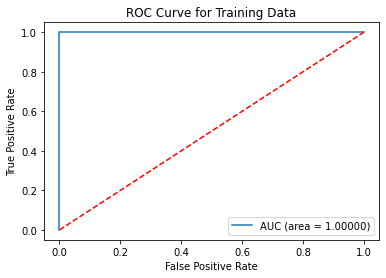

In [14]:
print("Summary of TRAINING SET: ")
print()

print("Confusion matrix: ")
print(confusion_matrix(y_training, y_train_predicted))
print()

print("Accuracy Score: ")
print(accuracy_score(y_training, y_train_predicted))
print()

print("Precision score: ")
print(precision_score(y_training, y_train_predicted))
print()

print("Recall Score: ")
print(recall_score(y_training, y_train_predicted))
print()

#if your precision and recall are equal, all your F1s should be the same...

print("ROC-AUC Score:")
print(roc_auc_score(y_training, y_train_predicted))
print()

print("F1 Score: ")
print(f1_score(y_training, y_train_predicted))
print()

# ROC Curve = TPR (x-axis) vs. FPR (y-axis).
print("ROC Curve: ")
fpr, tpr, thresholds = roc_curve(y_training, y_train_predicted, pos_label = 1)
logit_roc_auc = roc_auc_score(y_training, y_train_predicted)
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.5f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend(loc="lower right") 
plt.show() 

### iii) Test the algorithm on the test set and calculate the confusion matrix, accu- racy, precision, recall, and F1 score as well as the ROC curve and AUC for the test set. Which one is more important in this application, precision or recall? Calculate Fβ score for β ∈ {0.1, 0.5, .9, 1, 5, 10}.

In [15]:
y_test_predicted = best_model.predict(x_test)
y_test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Summary of TEST SET: 

Confusion matrix: 
[[40  1]
 [ 1 48]]

Accuracy Score: 
0.9777777777777777

Precision score: 
0.9795918367346939

Recall Score: 
0.9795918367346939

ROC-AUC Score:
0.9776007964161274

F1 Score: 
0.9795918367346939

ROC Curve: 


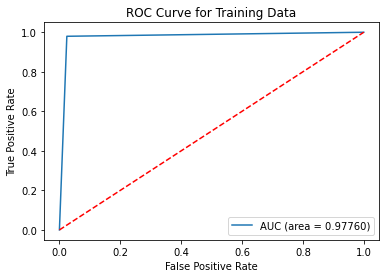

In [16]:
print("Summary of TEST SET: ")
print()

print("Confusion matrix: ")
print(confusion_matrix(y_test, y_test_predicted))
print()

print("Accuracy Score: ")
accuracy_eminem_l2 = accuracy_score(y_test, y_test_predicted)
print(accuracy_eminem_l2)
print()

print("Precision score: ")
precision_eminem_l2 = precision_score(y_test, y_test_predicted)
print(precision_eminem_l2)
print()

print("Recall Score: ")
recall_eminem_l2 = recall_score(y_test, y_test_predicted)
print(recall_eminem_l2)
print()

print("ROC-AUC Score:")
roc_auc_eminem_l2 = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_eminem_l2)
print()

print("F1 Score: ")
f1_eminem_l2 = f1_score(y_test, y_test_predicted)
print(f1_eminem_l2)
print()

# ROC Curve = TPR (x-axis) vs. FPR (y-axis).
print("ROC Curve: ")
fpr, tpr, thresholds = roc_curve(y_test, y_test_predicted, pos_label = 1)
logit_roc_auc = roc_auc_score(y_test, y_test_predicted)
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.5f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend(loc="lower right") 
plt.show() 

Precision tells us how many times an outcome was actually positive after it was predicted to be positive. Recall us tells out of actual positive data, how many times instances were predicted correctly. Recall is more important than precision when the cost of acting is low, but the opportunity cost is high. In this case, if a spam comment (positive case) is left undetected and and isn't categorized as spam, it's not such a big deal. However, if a comment is not spam (negative case), then it must not be categorized as spam. So for this spam detection, precision is more important than recall.

In [17]:
betas = [0.1,0.5,0.9,1,5,10]
f_beta = []

for i in betas:
    f_beta.append((i**2+1)/(((i**2)/recall_eminem_l2)+(1/precision_eminem_l2)))

print('F_beta Scores for beta = {0.1,0.5,0.9,1,5,10}:')
print(f_beta)

F_beta Scores for beta = {0.1,0.5,0.9,1,5,10}:
[0.979591836734694, 0.979591836734694, 0.979591836734694, 0.979591836734694, 0.979591836734694, 0.979591836734694]


## D) 𝓛1-penalized Logistic Regression

### i) Determine λ using five fold cross-validation on your training set. Consider log10 λ ∈ {−5,−4,...,5}.

In [18]:
logistic = linear_model.LogisticRegression()

penalty = ['l1']
c = [pow(10,i) for i in range(-5,6)]
print("C: ", c)
parameters = {"C":c, "penalty": penalty, "solver":["saga"]}

gridcv = GridSearchCV(logistic, parameters, cv = 5, n_jobs = -1)

best_model = gridcv.fit(x_training, y_training)
best_c = best_model.best_estimator_.get_params()['C']

print("Best C: ", best_c)
print("Best Lambda: (1/",best_c,")")

C:  [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
Best C:  1000
Best Lambda: (1/ 1000 )


### ii) Train L1-penalized Logistic Regression using the λ you found in 1(e)i. Calculate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for your training set.

In [19]:
y_train_predicted = best_model.predict(x_training)
y_train_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Summary of TRAINING SET: 

Confusion matrix: 
[[162   0]
 [  0 196]]

Accuracy Score: 
1.0

Precision score: 
1.0

Recall Score: 
1.0

ROC-AUC Score:
1.0

F1 Score: 
1.0

ROC Curve: 


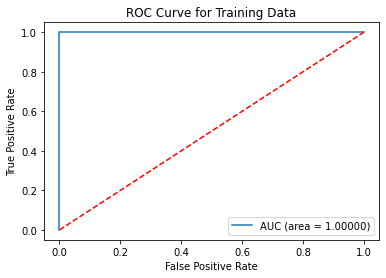

In [20]:
print("Summary of TRAINING SET: ")
print()

print("Confusion matrix: ")
print(confusion_matrix(y_training, y_train_predicted))
print()

print("Accuracy Score: ")
print(accuracy_score(y_training, y_train_predicted))
print()

print("Precision score: ")
print(precision_score(y_training, y_train_predicted))
print()

print("Recall Score: ")
print(recall_score(y_training, y_train_predicted))
print()

#if your precision and recall are equal, all your F1s should be the same...

print("ROC-AUC Score:")
print(roc_auc_score(y_training, y_train_predicted))
print()

print("F1 Score: ")
print(f1_score(y_training, y_train_predicted))
print()

# ROC Curve = TPR (x-axis) vs. FPR (y-axis).
print("ROC Curve: ")
fpr, tpr, thresholds = roc_curve(y_training, y_train_predicted, pos_label = 1)
logit_roc_auc = roc_auc_score(y_training, y_train_predicted)
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.5f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend(loc="lower right") 
plt.show() 

In [21]:
y_test_predicted = best_model.predict(x_test)
y_test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

Summary of TEST SET: 

Confusion matrix: 
[[40  1]
 [ 2 47]]

Accuracy Score: 
0.9666666666666667

Precision score: 
0.9791666666666666

Recall Score: 
0.9591836734693877

ROC-AUC Score:
0.9673967147834743

F1 Score: 
0.9690721649484536

ROC Curve: 


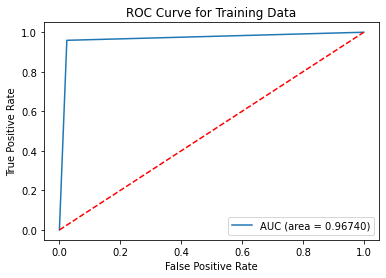

In [22]:
print("Summary of TEST SET: ")
print()

print("Confusion matrix: ")
print(confusion_matrix(y_test, y_test_predicted))
print()

print("Accuracy Score: ")
accuracy_eminem_l1 = accuracy_score(y_test, y_test_predicted)
print(accuracy_eminem_l1)
print()

print("Precision score: ")
precision_eminem_l1 = precision_score(y_test, y_test_predicted)
print(precision_eminem_l1)
print()

print("Recall Score: ")
recall_eminem_l1 = recall_score(y_test, y_test_predicted)
print(recall_eminem_l1)
print()

print("ROC-AUC Score:")
roc_auc_eminem_l1 = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_eminem_l1)
print()

print("F1 Score: ")
f1_eminem_l1 = f1_score(y_test, y_test_predicted)
print(f1_eminem_l1)
print()

# ROC Curve = TPR (x-axis) vs. FPR (y-axis).
print("ROC Curve: ")
fpr, tpr, thresholds = roc_curve(y_test, y_test_predicted, pos_label = 1)
logit_roc_auc = roc_auc_score(y_test, y_test_predicted)
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.5f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend(loc="lower right") 
plt.show() 

## F) Binary Classification Using Naive Bayes’ Classifiers

### i) Solve the problem using a Naive Bayes’ classifier. Use Gaussian class conditional distributions. Report the confusion matrix, ROC, precision, recall, F1 score, and AUC for both the train and test data sets.

In [23]:
gaus_nb = GaussianNB()
gaus_nb.fit(x_training, y_training)

GaussianNB()

In [24]:
y_training_predicted = gaus_nb.predict(x_training)
y_training_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [25]:
y_test_predicted = gaus_nb.predict(x_test)
y_test_predicted

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Summary of TRAINING SET: 

Confusion matrix: 
[[162   0]
 [  0 196]]

Accuracy Score: 
1.0

Precision score: 
1.0

Recall Score: 
1.0

ROC-AUC Score:
1.0

F1 Score: 
1.0

ROC Curve: 


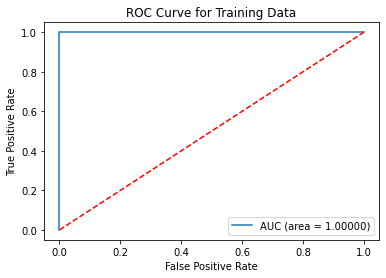

In [26]:
print("Summary of TRAINING SET: ")
print()

print("Confusion matrix: ")
print(confusion_matrix(y_training, y_train_predicted))
print()

print("Accuracy Score: ")
print(accuracy_score(y_training, y_train_predicted))
print()

print("Precision score: ")
print(precision_score(y_training, y_train_predicted))
print()

print("Recall Score: ")
print(recall_score(y_training, y_train_predicted))
print()

#if your precision and recall are equal, all your F1s should be the same...

print("ROC-AUC Score:")
print(roc_auc_score(y_training, y_train_predicted))
print()

print("F1 Score: ")
print(f1_score(y_training, y_train_predicted))
print()

# ROC Curve = TPR (x-axis) vs. FPR (y-axis).
print("ROC Curve: ")
fpr, tpr, thresholds = roc_curve(y_training, y_train_predicted, pos_label = 1)
logit_roc_auc = roc_auc_score(y_training, y_train_predicted)
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.5f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend(loc="lower right") 
plt.show() 

Summary of TEST SET: 

Confusion matrix: 
[[35  6]
 [ 1 48]]

Accuracy Score: 
0.9222222222222223

Precision score: 
0.8888888888888888

Recall Score: 
0.9795918367346939

ROC-AUC Score:
0.9166251866600298

F1 Score: 
0.9320388349514563

ROC Curve: 


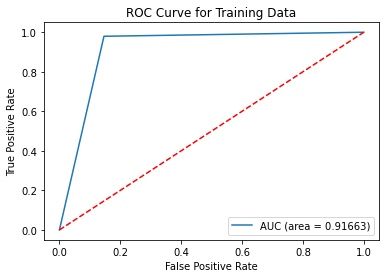

In [27]:
print("Summary of TEST SET: ")
print()

print("Confusion matrix: ")
print(confusion_matrix(y_test, y_test_predicted))
print()

print("Accuracy Score: ")
accuracy_eminem_gnb = accuracy_score(y_test, y_test_predicted)
print(accuracy_eminem_gnb)
print()

print("Precision score: ")
precision_eminem_gnb = precision_score(y_test, y_test_predicted)
print(precision_eminem_gnb)
print()

print("Recall Score: ")
recall_eminem_gnb = recall_score(y_test, y_test_predicted)
print(recall_eminem_gnb)
print()

print("ROC-AUC Score:")
roc_auc_eminem_gnb = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_eminem_gnb)
print()

print("F1 Score: ")
f1_eminem_gnb = f1_score(y_test, y_test_predicted)
print(f1_eminem_gnb)
print()

# ROC Curve = TPR (x-axis) vs. FPR (y-axis).
print("ROC Curve: ")
fpr, tpr, thresholds = roc_curve(y_test, y_test_predicted, pos_label = 1)
logit_roc_auc = roc_auc_score(y_test, y_test_predicted)
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.5f)' % logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend(loc="lower right") 
plt.show() 

## G) Repeat 1(f)i using multinomial priors.

In [28]:
multinomial_nb = MultinomialNB() 
multinomial_nb.fit(x_training, y_training)

y_test_predicted = multinomial_nb.predict(x_test)
y_test_predicted

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [29]:
print("Summary of TEST SET for Multinomial Naive Bayes: ")
print()

print("Accuracy Score: ")
accuracy_eminem_mnb = accuracy_score(y_test, y_test_predicted)
print(accuracy_eminem_mnb)
print()

print("Precision score: ")
precision_eminem_mnb = precision_score(y_test, y_test_predicted)
print(precision_eminem_mnb)
print()

print("Recall Score: ")
recall_eminem_mnb = recall_score(y_test, y_test_predicted)
print(recall_eminem_mnb)
print()

print("ROC-AUC Score:")
roc_auc_eminem_mnb = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_eminem_mnb)
print()

print("F1 Score: ")
f1_eminem_mnb = f1_score(y_test, y_test_predicted)
print(f1_eminem_mnb)
print()

Summary of TEST SET for Multinomial Naive Bayes: 

Accuracy Score: 
0.9111111111111111

Precision score: 
0.8596491228070176

Recall Score: 
1.0

ROC-AUC Score:
0.9024390243902439

F1 Score: 
0.9245283018867925



## H) Extra Credit: Create one table for each of the five data sets: Shakira, Eminem, LMFAO, KatyPerry, and Psy to compare accuracy, precision, recall, F1 score and AUC of L1-penalized and L2-penalized logistic regression, Na ̈ıve Bayes’ with Gaussian and multinomial priors for the test sets. Use the first ⌊0.8H⌋ of H hams and the first ⌊0.8S⌋ of S spams as your training set and the rest as your test set.

### i) Eminem Dataset

In [30]:
print("Instance   Accuracy              Precision            Recall              F1                 AUC")
print("L2:     ", accuracy_eminem_l2, precision_eminem_l2, recall_eminem_l2, f1_eminem_l2, roc_auc_eminem_l2)
print("L1:     ", accuracy_eminem_l1, precision_eminem_l1, recall_eminem_l1, f1_eminem_l1, roc_auc_eminem_l1)
print("GNB:     ", accuracy_eminem_gnb, precision_eminem_gnb, recall_eminem_gnb, f1_eminem_gnb, roc_auc_eminem_gnb)
print("MNB:     ", accuracy_eminem_mnb, precision_eminem_mnb, recall_eminem_mnb, f1_eminem_mnb, roc_auc_eminem_mnb)

Instance   Accuracy              Precision            Recall              F1                 AUC
L2:      0.9777777777777777 0.9795918367346939 0.9795918367346939 0.9795918367346939 0.9776007964161274
L1:      0.9666666666666667 0.9791666666666666 0.9591836734693877 0.9690721649484536 0.9673967147834743
GNB:      0.9222222222222223 0.8888888888888888 0.9795918367346939 0.9320388349514563 0.9166251866600298
MNB:      0.9111111111111111 0.8596491228070176 1.0 0.9245283018867925 0.9024390243902439


                                         Eminem Model Summary:

| Instance | Accuracy | Precision | Recall | F1 | AUC |
| :- | -: | :-: | :-: | :-: | :-: |
| L2 | **0.98** | **0.98** | **0.98** | **0.98** | **0.98**
| L1 | 0.97 | 0.98 | 0.96 | 0.97 | 0.97
| NB-Gaussian | 0.92 | 0.89 | **0.98** | 0.93 | 0.91
| NB-Multinomial | 0.91 | 0.86 | 1.0 | 0.92 | 0.90

### ii) Shakira Dataset 

In [31]:
df = pd.read_csv("dsci352-datasets/Youtube05-Shakira.csv")
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0
...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [32]:
# Convert comment column from Eminem corpus into array -- entire dataset
corpus_content = df['CONTENT']
corpus = pd.DataFrame(corpus_content).to_numpy()
corpus = list(itertools.chain.from_iterable(corpus))
corpus

['Nice song\ufeff',
 'I love song \ufeff',
 'I love song \ufeff',
 '860,000,000 lets make it first female to reach one billion!! Share it and replay it! \ufeff',
 'shakira is best for worldcup\ufeff',
 'The best world cup song ever!!!!\ufeff',
 'I love\ufeff',
 'SEE SOME MORE SONG OPEN GOOGLE AND TYPE Shakira GuruOfMovie\ufeff',
 'Awesome \ufeff',
 'I like shakira..\ufeff',
 'Shakira - Waka Waka <br />LOVE THIS SONG!!!!!!!!!!!!!!!\ufeff',
 'Why so many disliked??????!!!!!!😯\ufeff',
 'I don&#39;t think this song will ever get old \ufeff',
 'Love song\ufeff',
 'wery good\ufeff',
 'Every time I hear this song, I think about Iniesta&#39;s goal against the Netherlands...\ufeff',
 'Whose watching this in 2015. If so hi-5\ufeff',
 'I love this song so much &lt;3<br />Keep em&#39; coming!\ufeff',
 'i love this song thumsb up to you\ufeff',
 'Waka best one\ufeff',
 '5 years later i still love this song\xa0<br />~Axy665\ufeff',
 'Like\ufeff',
 'Check out this playlist on YouTube:\ufeff',
 'Her v

In [33]:
# Create instance of tfidf vectorizer and fit to corpus.
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [34]:
print("Feature Names: ", vectorizer.get_feature_names())

Feature Names:  ['00', '000', '0687119038', '08', '10', '100', '101721377578919894134', '108k', '128gb', '13', '14', '14gkvdo', '15', '16gb', '17', '18', '19', '1billiom', '1bsefqe', '1hmvtx', '1m00s', '20', '200', '2004', '200mm', '2010', '2013', '2015', '23', '25', '250', '320', '32gb', '33', '333', '35', '360', '385', '387', '39', '390', '3d', '40', '4000', '421', '433', '4500', '4g', '4gb', '4netjobs', '4th', '50', '500', '5000', '50k', '510', '515', '55', '550', '55mm', '5tu9gn1l310', '60', '600', '682', '753', '7in', '860', '868', '9nl', 'abominable', 'abomination', 'about', 'absolutely', 'absorbing', 'account', 'acidic', 'acquire', 'acquiring', 'act', 'actually', 'adam', 'addition', 'adele', 'adf', 'admirable', 'adore', 'adroid', 'advertise', 'advertisements', 'advertisiments', 'affiliated', 'afflicted', 'africa', 'african', 'africans', 'after', 'again', 'against', 'ago', 'agree', 'ahead', 'aid', 'air', 'aka', 'album', 'all', 'alot', 'already', 'also', 'alvar', 'always', 'am', '

In [35]:
tf_idf_features = pd.DataFrame(X.toarray())
tf_idf_features.columns = ['00', '000', '0687119038', '08', '10', '100', '101721377578919894134', '108k', '128gb', '13', '14', '14gkvdo', '15', '16gb', '17', '18', '19', '1billiom', '1bsefqe', '1hmvtx', '1m00s', '20', '200', '2004', '200mm', '2010', '2013', '2015', '23', '25', '250', '320', '32gb', '33', '333', '35', '360', '385', '387', '39', '390', '3d', '40', '4000', '421', '433', '4500', '4g', '4gb', '4netjobs', '4th', '50', '500', '5000', '50k', '510', '515', '55', '550', '55mm', '5tu9gn1l310', '60', '600', '682', '753', '7in', '860', '868', '9nl', 'abominable', 'abomination', 'about', 'absolutely', 'absorbing', 'account', 'acidic', 'acquire', 'acquiring', 'act', 'actually', 'adam', 'addition', 'adele', 'adf', 'admirable', 'adore', 'adroid', 'advertise', 'advertisements', 'advertisiments', 'affiliated', 'afflicted', 'africa', 'african', 'africans', 'after', 'again', 'against', 'ago', 'agree', 'ahead', 'aid', 'air', 'aka', 'album', 'all', 'alot', 'already', 'also', 'alvar', 'always', 'am', 'amazed', 'amazement', 'amazing', 'amazon', 'ambition', 'ambitious', 'amendment', 'american', 'americans', 'amiable', 'amount', 'amp', 'amy', 'an', 'ancestors', 'and', 'anderson', 'angels', 'animal', 'animation', 'animator', 'annoyed', 'annoying', 'another', 'any', 'anyone', 'anything', 'apostles', 'app', 'apple', 'appoints', 'appreciate', 'appreciated', 'apprecitate', 'approve', 'apps', 'arbitrate', 'are', 'around', 'artist', 'as', 'ask', 'assume', 'at', 'audit', 'aunt', 'autotuned', 'avicii', 'away', 'awesome', 'axiomatic', 'axy665', 'ba', 'baba', 'back', 'bad', 'ball', 'band', 'bands', 'banging', 'bass', 'be', 'beautiful', 'beauty', 'because', 'become', 'been', 'begin', 'behavior', 'behold', 'being', 'belgium', 'believe', 'believer', 'beneath', 'best', 'bet', 'betfair', 'better', 'beutiful', 'bieber', 'billion', 'bit', 'bitch', 'black', 'blank', 'blog', 'blogfa', 'blogspot', 'blonde', 'bonus', 'bookies', 'bookmakers', 'boost', 'born', 'box', 'boxium', 'boy', 'boys', 'br', 'brake', 'brazil', 'brazilian', 'bring', 'brinkman', 'britishs', 'brothers', 'bucks', 'bumps', 'burder', 'business', 'but', 'button', 'buy', 'by', 'call', 'called', 'calls', 'camera', 'camp', 'can', 'canal', 'cap', 'car', 'card', 'cards', 'cares', 'case', 'cause', 'cd', 'cease', 'celeb', 'celebrated', 'celebration', 'celebrity', 'central', 'cents', 'cge', 'chance', 'change', 'channel', 'channnnnnelll', 'chap', 'charity', 'chaste', 'check', 'cheers', 'chills', 'choice', 'christ', 'christians', 'cid', 'claiming', 'clap', 'class', 'claster', 'click', 'close', 'closer', 'co', 'coby', 'cock', 'code', 'colorful', 'colour', 'columbus', 'com', 'come', 'comedy', 'comes', 'comfort', 'comforter', 'coming', 'comment', 'comments', 'commit', 'company', 'compared', 'complete', 'completely', 'comprehend', 'conceived', 'conciliate', 'confessors', 'congress', 'conhece', 'constitution', 'consumers', 'contact', 'continue', 'convinced', 'cool', 'core', 'cost', 'couch', 'could', 'counsel', 'countless', 'country', 'court', 'cover', 'covers', 'crank', 'crazy', 'creator', 'crestboot', 'cup', 'curly', 'currently', 'cute', 'cutie', 'cuz', 'cyrus', 'd90', 'da', 'daily', 'damn', 'dance', 'dancer', 'dancing', 'daneja', 'dark', 'day', 'de', 'deals', 'decided', 'dedication', 'definitely', 'definitily', 'definitley', 'del', 'delete', 'demonstrating', 'describes', 'designs', 'dickwad', 'did', 'different', 'dis', 'discrimination', 'discusss', 'disguise', 'dislike', 'disliked', 'dislikes', 'divine', 'do', 'does', 'doesn', 'doing', 'dollar', 'don', 'donate', 'donating', 'done', 'dont', 'dot', 'download', 'dragons', 'drake', 'dream', 'dreamers', 'dreaming', 'dribbleproshot', 'drives', 'drums', 'dtqcftr1fac', 'dubstep', 'duzafizz', 'earn', 'earning', 'earth', 'easily', 'easy', 'echa', 'edge', 'edm', 'efforts', 'egoistic', 'eh', 'eight', 'ej', 'em', 'email', 'empire', 'enabled', 'enjoy', 'enjoyable', 'enlace', 'enlist', 'enormously', 'enter', 'entertainer', 'especially', 'estiloproduction', 'estonia', 'euro', 'euw', 'eva', 'even', 'event', 'ever', 'every', 'everyday', 'everyone', 'everything', 'evidence', 'evil', 'exact', 'expect', 'expecting', 'experience', 'expose', 'extraordinary', 'facebook', 'family', 'famine', 'famous', 'fans', 'fantastic', 'far', 'fast', 'fausto', 'fave', 'faves', 'favourite', 'fear', 'featuring', 'feed', 'feel', 'felt', 'female', 'few', 'fi', 'fiddle', 'fifa', 'fight', 'fighting', 'filibuster', 'financial', 'find', 'finding', 'firepa', 'first', 'floor', 'focuses', 'following', 'food', 'foot', 'football', 'for', 'forever', 'forget', 'forgetful', 'forgot', 'form', 'forty', 'forward', 'found', 'founded', 'foward', 'fr', 'fragile', 'france', 'free', 'freedom', 'freestyle', 'french', 'frequent', 'friend', 'friends', 'fright', 'frndzzl', 'from', 'fuck', 'fucking', 'fun', 'future', 'fyi', 'gain', 'gained', 'galaxy', 'game', 'gamezz', 'gamezzmta', 'gangnam', 'gardner', 'gave', 'gen', 'generated', 'generation', 'germany', 'get', 'gets', 'getting', 'gift', 'girl', 'girls', 'give', 'gives', 'giving', 'gmail', 'go', 'goal', 'goals', 'god', 'going', 'gonna', 'good', 'google', 'goood', 'goose', 'gorgeous', 'got', 'grace', 'grass', 'great', 'gt', 'gta', 'guess', 'guide', 'guitar', 'guruofmovie', 'gusttavo', 'guys', 'gypsy', 'haha', 'hahahahah', 'hair', 'half', 'halloween', 'hands', 'happen', 'happening', 'happy', 'hard', 'harder', 'has', 'hate', 'have', 'hdtv', 'he', 'headerclick', 'hear', 'heard', 'hearing', 'heaven', 'hell', 'hello', 'help', 'her', 'here', 'herself', 'hey', 'hh', 'hi', 'high', 'highly', 'hilarious', 'him', 'hips', 'hiring', 'his', 'historical', 'hit', 'holy', 'home', 'honest', 'hope', 'hopefully', 'hopme', 'horse', 'hot', 'hour', 'hours', 'house', 'how', 'href', 'ht', 'html', 'http', 'https', 'huge', 'humanity', 'i5', 'ice', 'if', 'ik', 'ill', 'ilove', 'ilovethissong', 'im', 'im2458444', 'imagine', 'immediately', 'importantly', 'impossible', 'improve', 'in', 'incandescent', 'inch', 'including', 'income', 'incredible', 'independent', 'industry', 'info', 'iniesta', 'innocent', 'inspire', 'instantly', 'instead', 'instrumental', 'insurance', 'intel', 'intention', 'into', 'investment', 'inviolate', 'ipad', 'iphone', 'irish', 'is', 'isn', 'it', 'its', 'itself', 'itt', 'itttttttt', 'iv', 'ja', 'jesus', 'jim', 'jobs', 'johnny', 'join', 'joining', 'juno', 'just', 'justice', 'justien', 'katy', 'keep', 'keeps', 'keyboards', 'kid', 'killed', 'killing', 'killtheclockhd', 'kind', 'kld3y', 'kluivert', 'know', 'knows', 'kodaline', 'kpop', 'la', 'lad', 'lake', 'lame', 'lamest', 'lana', 'lands', 'languages', 'large', 'later', 'latest', 'laugh', 'learn', 'least', 'led', 'leeched', 'left', 'leisure', 'lets', 'lie', 'life', 'like', 'liked', 'likes', 'liking', 'lima', 'line', 'link', 'lip', 'lisening', 'listen', 'listener', 'listening', 'live', 'lively', 'll', 'lol', 'long', 'look', 'looks', 'lord', 'loss', 'lot', 'lots', 'love', 'loved', 'lovely', 'lover', 'loves', 'loving', 'loyal', 'lt', 'luxuries', 'ly', 'lyrics', 'macabre', 'macbook', 'macklemore', 'made', 'madly', 'make', 'makes', 'making', 'man', 'many', 'marius1533', 'marketer', 'martin', 'martyrs', 'mary', 'master', 'mate', 'mates', 'matters', 'maybe', 'me', 'mean', 'meaning', 'meaningful', 'means', 'meat', 'media', 'meet', 'meh', 'memories', 'memory', 'men', 'mess', 'message', 'mi', 'might', 'miley', 'million', 'millions', 'min', 'mind', 'mini', 'minutes', 'mio', 'miss', 'mississippi', 'miusic', 'mixtape', 'model', 'moment', 'money', 'moneygq', 'month', 'monthly', 'more', 'morning', 'most', 'mother', 'motherland', 'movement', 'mta', 'much', 'murder', 'music', 'musician', 'musicvideo', 'muslims', 'must', 'mxh2y77', 'my', 'myself', 'name', 'named', 'nation', 'need', 'needed', 'neeru105', 'neighbor', 'netherland', 'netherlands', 'never', 'new', 'newest', 'news', 'nice', 'nicely', 'nick', 'night', 'nikon', 'nl', 'no', 'none', 'northland', 'not', 'nothing', 'now', 'nsa', 'number', 'numberless', 'nummber', 'não', 'obtain', 'of', 'off', 'offical', 'oh', 'oid', 'old', 'oldchat', 'omg', 'on', 'once', 'one', 'ones', 'online', 'only', 'open', 'openly', 'opportunity', 'or', 'original', 'other', 'others', 'ouf', 'ouffffffffffffffffff', 'our', 'ourself', 'out', 'over', 'own', 'page', 'pagee', 'paid', 'paidverts', 'paranormal', 'parody', 'part', 'partyman318', 'pass', 'passed', 'passion', 'passionate', 'past', 'patriarchs', 'patrik', 'patriot', 'paul', 'pay', 'pcs', 'peace', 'peaceful', 'people', 'peoples', 'pepelexa', 'per', 'perfect', 'perform', 'perhaps', 'perry', 'person', 'perverse', 'petition', 'piano', 'picture', 'pink', 'pisses', 'plausible', 'play', 'player', 'playlist', 'pleas', 'pleasant', 'please', 'pleassssssssssssssss', 'plot', 'plus', 'plz', 'plzz', 'poor', 'population', 'porno', 'portugal', 'possible', 'post_10', 'posted', 'postponing', 'ppl', 'pranks', 'pray', 'prepare', 'present', 'press', 'pretty', 'price', 'prior', 'privacy', 'pro', 'probably', 'producer', 'profile', 'proflink', 'proflinkprefix', 'proflinkwrapper', 'promise', 'promotes', 'prophets', 'protect', 'protest', 'proud', 'prove', 'prpeedmmmq0', 'ps4', 'psn', 'purchase', 'pure', 'push', 'put', 'quality', 'queen', 'quid', 'quot', 'racist', 'racists', 'raise', 'rand', 'range', 'rapper', 'rate', 're', 'reach', 'read', 'reading', 'reads', 'real', 'realized', 'really', 'reason', 'reasons', 'recipe', 'recognizes', 'recommend', 'record', 'recording', 'redeemer', 'reed', 'ref', 'refused', 'regret', 'remember', 'remezcla', 'remix', 'renewal', 'repay', 'replay', 'requite', 'respond', 'reveling', 'rey', 'richest', 'ricky', 'right', 'righteousness', 'rights', 'risk', 'roar', 'rocks', 'roll', 'rosary', 'roughly', 'rugby', 'rules', 's4', 'sad', 'said', 'saints', 'salvation', 'sam', 'same', 'samsung', 'saturday', 'saved', 'savior', 'say', 'saying', 'says', 'search', 'seat', 'second', 'seconds', 'secret', 'secrets', 'secure', 'see', 'seem', 'seen', 'selecting', 'senate', 'senator', 'senators', 'send', 'sexy', 'shaki', 'shakifans', 'shakira', 'shakiravevo', 'shakiria', 'shall', 
                           'shame', 'share', 'she', 'shit', 'shkira', 'shot', 'should', 'sign', 'significantly', 'sihaam01', 'silly', 'simple', 'simply', 'sin', 'sing', 'singer', 'singing', 'singlewave', 'sinned', 'sins', 'sisters', 'site', 'sites', 'skills', 'skin', 'skip', 'slash', 'slr', 'small', 'smart', 'smh', 'smoking', 'so', 'soccer', 'social', 'society', 'some', 'someone', 'something', 'son', 'song', 'songs', 'songwriter', 'sony', 'soo', 'soon', 'sooooo', 'sorry', 'sound', 'sounds', 'south', 'space', 'spain', 'spam', 'spamming', 'span', 'spanish', 'spare', 'speaks', 'special', 'speech', 'spending', 'spent', 'spirits', 'spourmo', 'spread', 'spying', 'stand', 'start', 'started', 'statement', 'step', 'steven', 'stil', 'still', 'stop', 'store', 'strategizes', 'streets', 'stretch', 'student', 'style', 'sub', 'submits', 'subscribe', 'subscribed', 'subscribeeeeeeeeee', 'subscribers', 'subscribing', 'subscription', 'substantially', 'succeeds', 'success', 'successful', 'such', 'sucking', 'sucks', 'summer', 'super', 'support', 'supported', 'supreme', 'sure', 'surveys', 'suscribe', 'suscribite', 'suscríbase', 'swagfriends', 'swear', 'swim', 'synch', 'taaee', 'take', 'talking', 'tan', 'tapes', 'team', 'technique', 'teenage', 'tell', 'tells', 'terrible', 'terrorism', 'terrorist', 'than', 'thank', 'thanks', 'thankss', 'that', 'the', 'their', 'them', 'then', 'thepetitionsite', 'there', 'theres', 'therglove', 'these', 'they', 'things', 'think', 'this', 'those', 'thousands', 'three', 'thumb', 'thumbs', 'thumsb', 'thus', 'time', 'times', 'tinyurl', 'tk', 'to', 'today', 'together', 'too', 'took', 'top', 'torunament', 'totally', 'town', 'trade', 'trafficking', 'transformed', 'transport', 'trayvon', 'tried', 'true', 'truly', 'trumpetcallofgodonline', 'truth', 'trying', 'tube', 'tunez', 'turned', 'tvcmcadavid', 'twitter', 'two', 'type', 'types', 'uk', 'ultrabooks', 'un', 'uncle', 'undefiled', 'under', 'underrated', 'understand', 'unique', 'unit', 'united', 'unlocked', 'until', 'up', 'upto', 'us', 'useful', 'usl', 'vaio', 'vanstone', 've', 'versace', 'version', 'very', 'vibe', 'video', 'videos', 'vids', 'view', 'views', 'vincent', 'vines', 'virgin', 'virgins', 'visit', 'vistazo', 'você', 'voice', 'vote', 'vouchers', 'vídeo', 'wafence', 'wager', 'wagers', 'waka', 'wake', 'wallet', 'wan', 'wanderfol', 'wanna', 'want', 'wants', 'was', 'wasn', 'wasting', 'watch', 'watched', 'watching', 'wats', 'way', 'ways', 'we', 'web', 'website', 'weebly', 'week', 'weird', 'well', 'wellcomemd', 'were', 'wery', 'what', 'whats', 'whatuknow', 'when', 'where', 'which', 'while', 'white', 'whitney', 'who', 'whole', 'wholehearted', 'whose', 'why', 'wi', 'wickedness', 'wide', 'wil', 'will', 'willing', 'wilsubscribe', 'win', 'winners', 'winooze', 'wiredo', 'wish', 'with', 'without', 'wk', 'woman', 'womanly', 'women', 'won', 'wont', 'wooooo', 'word', 'words', 'work', 'working', 'works', 'world', 'worldcup', 'worried', 'worth', 'would', 'wow', 'wrecking', 'write', 'writer', 'wurkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk', 'ww', 'www', 'x3333333333', 'xxx', 'ya', 'yall', 'ybuwyn', 'yea', 'yeah', 'year', 'years', 'yet', 'you', 'your', 'yourself', 'youtube', 'youtubers', 'zealous', 'zonepa', 'ｃｏｍ', 'ｅｂａｙ', 'ｈｔｔｐ', 'ｓｈｏｅｃｏｌｌｅｃｔｏｒ314', 'ｕｓｒ', 'ｗｗｗ']

In [36]:
tf_idf_features

,00,000,0687119038,08,10,100,101721377578919894134,108k,128gb,13,...,youtube,youtubers,zealous,zonepa,ｃｏｍ,ｅｂａｙ,ｈｔｔｐ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｕｓｒ,ｗｗｗ
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.446872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
366,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
367,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# add class column from df to vecotized df
class_column = df[['CLASS']]
class_column
tf_idf_features['CLASS'] = class_column
tf_idf_features

,00,000,0687119038,08,10,100,101721377578919894134,108k,128gb,13,...,youtubers,zealous,zonepa,ｃｏｍ,ｅｂａｙ,ｈｔｔｐ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｕｓｒ,ｗｗｗ,CLASS
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.446872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
366,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
367,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
368,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [38]:
hams = tf_idf_features[tf_idf_features['CLASS'] == 0]
percentHam = round(len(hams) * 0.8)

firstHam = hams[0:percentHam]
lastHam = hams[percentHam:]

spams = tf_idf_features[tf_idf_features['CLASS'] == 1]
percentSpam = round(len(spams) * 0.8)

firstSpam = spams[0:percentSpam]
lastSpam = spams[percentSpam:]

training_set = [firstHam, firstSpam]
training_set = pd.concat(training_set)

test_set = [lastHam, lastSpam]
test_set = pd.concat(test_set)

x_training = training_set.iloc[:, :-1].values
y_training = training_set.iloc[:, 1357].values

x_test = test_set.iloc[:, :-1].values
y_test = test_set.iloc[:, 1357].values

In [39]:
print("X-Training Data")
print(x_training)
print()
print("Y-Training Data")
print(y_training)
print()
print("X-Test Data")
print(x_test)
print()
print("Y-Test Data")
print(y_test)

X-Training Data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Y-Training Data
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

X-Test Data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Y-Test Data
[0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [40]:
logistic = linear_model.LogisticRegression()

penalty = ['l2']
c = [pow(10,i) for i in range(-5,6)]
print("C: ", c)
parameters = {"C":c, "penalty": penalty, "solver":["saga"]}

gridcv = GridSearchCV(logistic, parameters, cv = 5, n_jobs = -1)

best_model = gridcv.fit(x_training, y_training)
best_c = best_model.best_estimator_.get_params()['C']

print("Best C: ", best_c)
print("Best Lambda: (1/",best_c,")")

C:  [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
Best C:  10
Best Lambda: (1/ 10 )


In [41]:
y_test_predicted = best_model.predict(x_test)
y_test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [42]:
print("Summary of TEST SET for L2 Penalized Logistic Regression: ")
print()

print("Accuracy Score: ")
accuracy_shakira_l2 = accuracy_score(y_test, y_test_predicted)
print(accuracy_shakira_l2)
print()

print("Precision score: ")
precision_shakira_l2 = precision_score(y_test, y_test_predicted)
print(precision_shakira_l2)
print()

print("Recall Score: ")
recall_shakira_l2 = recall_score(y_test, y_test_predicted)
print(recall_shakira_l2)
print()

print("ROC-AUC Score:")
roc_auc_shakira_l2 = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_shakira_l2)
print()

print("F1 Score: ")
f1_shakira_l2 = f1_score(y_test, y_test_predicted)
print(f1_shakira_l2)
print()

Summary of TEST SET for L2 Penalized Logistic Regression: 

Accuracy Score: 
0.9594594594594594

Precision score: 
0.9444444444444444

Recall Score: 
0.9714285714285714

ROC-AUC Score:
0.9600732600732601

F1 Score: 
0.9577464788732395



In [43]:
logistic = linear_model.LogisticRegression()

penalty = ['l1']
c = [pow(10,i) for i in range(-5,6)]
print("C: ", c)
parameters = {"C":c, "penalty": penalty, "solver":["saga"]}

gridcv = GridSearchCV(logistic, parameters, cv = 5, n_jobs = -1)

best_model = gridcv.fit(x_training, y_training)
best_c = best_model.best_estimator_.get_params()['C']

print("Best C: ", best_c)
print("Best Lambda: (1/",best_c,")")

C:  [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
Best C:  100
Best Lambda: (1/ 100 )


In [44]:
y_test_predicted = best_model.predict(x_test)
y_test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [45]:
print("Summary of TEST SET for L1 Penalized Logistic Regression: ")
print()

print("Accuracy Score: ")
accuracy_shakira_l1 = accuracy_score(y_test, y_test_predicted)
print(accuracy_shakira_l1)
print()

print("Precision score: ")
precision_shakira_l1 = precision_score(y_test, y_test_predicted)
print(precision_shakira_l1)
print()

print("Recall Score: ")
recall_shakira_l1 = recall_score(y_test, y_test_predicted)
print(recall_shakira_l1)
print()

print("ROC-AUC Score:")
roc_auc_shakira_l1 = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_shakira_l1)
print()

print("F1 Score: ")
f1_shakira_l1 = f1_score(y_test, y_test_predicted)
print(f1_shakira_l1)
print()

Summary of TEST SET for L1 Penalized Logistic Regression: 

Accuracy Score: 
0.9594594594594594

Precision score: 
0.9444444444444444

Recall Score: 
0.9714285714285714

ROC-AUC Score:
0.9600732600732601

F1 Score: 
0.9577464788732395



In [46]:
gaus_nb = GaussianNB()
gaus_nb.fit(x_training, y_training)

GaussianNB()

In [47]:
y_test_predicted = gaus_nb.predict(x_test)
y_test_predicted

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [48]:
print("Summary of TEST SET for Gaussian Naive Bayes: ")
print()

print("Accuracy Score: ")
accuracy_shakira_gnb = accuracy_score(y_test, y_test_predicted)
print(accuracy_shakira_gnb)
print()

print("Precision score: ")
precision_shakira_gnb = precision_score(y_test, y_test_predicted)
print(precision_shakira_gnb)
print()

print("Recall Score: ")
recall_shakira_gnb = recall_score(y_test, y_test_predicted)
print(recall_shakira_gnb)
print()

print("ROC-AUC Score:")
roc_auc_shakira_gnb = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_shakira_gnb)
print()

print("F1 Score: ")
f1_shakira_gnb = f1_score(y_test, y_test_predicted)
print(f1_shakira_gnb)
print()

Summary of TEST SET for Gaussian Naive Bayes: 

Accuracy Score: 
0.9054054054054054

Precision score: 
0.8333333333333334

Recall Score: 
1.0

ROC-AUC Score:
0.9102564102564102

F1 Score: 
0.9090909090909091



In [49]:
multinomial_nb = MultinomialNB() 
multinomial_nb.fit(x_training, y_training)

MultinomialNB()

In [50]:
y_test_predicted = multinomial_nb.predict(x_test)
y_test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [51]:
print("Summary of TEST SET for Multinomial Naive Bayes: ")
print()

print("Accuracy Score: ")
accuracy_shakira_gnb = accuracy_score(y_test, y_test_predicted)
print(accuracy_shakira_gnb)
print()

print("Precision score: ")
precision_shakira_gnb = precision_score(y_test, y_test_predicted)
print(precision_shakira_gnb)
print()

print("Recall Score: ")
recall_shakira_gnb = recall_score(y_test, y_test_predicted)
print(recall_shakira_gnb)
print()

print("ROC-AUC Score:")
roc_auc_shakira_gnb = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_shakira_gnb)
print()

print("F1 Score: ")
f1_shakira_gnb = f1_score(y_test, y_test_predicted)
print(f1_shakira_gnb)
print()

Summary of TEST SET for Multinomial Naive Bayes: 

Accuracy Score: 
0.9594594594594594

Precision score: 
0.9444444444444444

Recall Score: 
0.9714285714285714

ROC-AUC Score:
0.9600732600732601

F1 Score: 
0.9577464788732395



In [52]:
multinomial_nb = MultinomialNB() 
multinomial_nb.fit(x_training, y_training)

y_test_predicted = multinomial_nb.predict(x_test)
y_test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [53]:
print("Summary of TEST SET for Multinomial Naive Bayes: ")
print()

print("Accuracy Score: ")
accuracy_shakira_mnb = accuracy_score(y_test, y_test_predicted)
print(accuracy_shakira_mnb)
print()

print("Precision score: ")
precision_shakira_mnb = precision_score(y_test, y_test_predicted)
print(precision_shakira_mnb)
print()

print("Recall Score: ")
recall_shakira_mnb = recall_score(y_test, y_test_predicted)
print(recall_shakira_mnb)
print()

print("ROC-AUC Score:")
roc_auc_shakira_mnb = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_shakira_mnb)
print()

print("F1 Score: ")
f1_shakira_mnb = f1_score(y_test, y_test_predicted)
print(f1_shakira_mnb)
print()

Summary of TEST SET for Multinomial Naive Bayes: 

Accuracy Score: 
0.9594594594594594

Precision score: 
0.9444444444444444

Recall Score: 
0.9714285714285714

ROC-AUC Score:
0.9600732600732601

F1 Score: 
0.9577464788732395



In [54]:
print("Instance   Accuracy              Precision            Recall              F1                 AUC")
print("L2:     ", accuracy_shakira_l2, precision_shakira_l2, recall_shakira_l2, f1_shakira_l2, roc_auc_shakira_l2)
print("L1:     ", accuracy_shakira_l1, precision_shakira_l1, recall_shakira_l1, f1_shakira_l1, roc_auc_shakira_l1)
print("GNB:     ", accuracy_shakira_gnb, precision_shakira_gnb, recall_shakira_gnb, f1_shakira_gnb, roc_auc_shakira_gnb)
print("MNB:     ", accuracy_shakira_mnb, precision_shakira_mnb, recall_shakira_mnb, f1_shakira_mnb, roc_auc_shakira_mnb)

Instance   Accuracy              Precision            Recall              F1                 AUC
L2:      0.9594594594594594 0.9444444444444444 0.9714285714285714 0.9577464788732395 0.9600732600732601
L1:      0.9594594594594594 0.9444444444444444 0.9714285714285714 0.9577464788732395 0.9600732600732601
GNB:      0.9594594594594594 0.9444444444444444 0.9714285714285714 0.9577464788732395 0.9600732600732601
MNB:      0.9594594594594594 0.9444444444444444 0.9714285714285714 0.9577464788732395 0.9600732600732601


                                      Shakira Model Summary:

| Instance | Accuracy | Precision | Recall | F1 | AUC |
| :- | -: | :-: | :-: | :-: | :-: |
| L2 | 0.96 | 0.94 | 0.97 | 0.96 | 0.96
| L1 | 0.96 | 0.94 | 0.97 | 0.96 | 0.96
| NB-Gaussian | 0.96 | 0.94 | 0.97 | 0.96 | 0.96
| NB-Multinomial | 0.96 | 0.94 | 0.97 | 0.96 | 0.96

All models perform similarly on Shakira dataset.

### iii) LMFAO Dataset 

In [55]:
df = pd.read_csv("dsci352-datasets/Youtube03-LMFAO.csv")
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0
...,...,...,...,...,...
433,z13lvr4iupatjlrem231yvpxolzvspwdl,Salty Croc,2014-07-22T04:20:37.489000,Like this comment for no reason﻿,1
434,z12lxhrqdkyusbkji04cihtrvn3jvxnqszg0k,Bob Orton,2014-07-22T00:26:50.820000,love this song﻿,0
435,z12xhdjrsxm3v550w22oynsjrnmvjhkvj,LuckyMusiqLive,2014-07-21T22:25:54.048000,this song is awesome. these guys are the best....,1
436,z13msngo3qvwx1ym223pehqgouexzdmnm,xXxPWND 420xXx,2014-07-21T11:05:51.945000,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1


In [56]:
# Convert comment column from Eminem corpus into array -- entire dataset
corpus_content = df['CONTENT']
corpus = pd.DataFrame(corpus_content).to_numpy()
corpus = list(itertools.chain.from_iterable(corpus))
corpus

['<a href="http://www.youtube.com/watch?v=KQ6zr6kCPj8&amp;t=2m19s">2:19</a> best part\ufeff',
 'wierd but funny\ufeff',
 'Hey guys, I&#39;m a human.<br /><br /><br />But I don&#39;t want to be a human, I want to be a sexy fucking giraffe.<br /><br /><br />I already have the money for the surgery to elongate my spinal core, the surgery to change my skin pigment, and everything else! Like this post so others can root me on in my dream!!!!<br /><br /><br />Im fucking with you, I make music, check out my first song! <a rel="nofollow" class="ot-hashtag" href="https://plus.google.com/s/%23giraffebruuh">#giraffebruuh</a>\ufeff',
 'Party Rock....lol...who wants to shuffle!!!\ufeff',
 'Party rock\ufeff',
 'Shuffle\ufeff',
 'Omg\ufeff',
 'This song is just really fun \ufeff',
 'Awsome<br />\ufeff',
 'wow!!!!!! increible song!!!!!!!!!\ufeff',
 'I love this song so much\ufeff',
 '2015 LIKEEE\ufeff',
 'I miss when people dressed like this.\ufeff',
 '2011- the last year of decent music.\ufeff',
 'Be

In [57]:
# Create instance of tfidf vectorizer and fit to corpus.
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [58]:
print("Feature Names: ", vectorizer.get_feature_names())

Feature Names:  ['00', '000', '10', '100', '10000000', '1000000000', '104999962146104962510', '10b35481', '11', '1446084', '15', '17', '19', '1bi', '1k', '1m00s', '20', '200', '2004', '2011', '2015', '2016', '23everydayimvaping', '23giraffebruuh', '23kinglothedancer', '23lmfao', '247', '27', '28', '2m19s', '301', '39', '3m', '3m40s', '3m57s', '40', '4m11s', '4th', '50', '500', '5000', '505b0232', '566', '57', '5th', '666', '700', '800', '851', '870', '90', '90000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', '920', '__', '______________________', '______________________________', 'abomination', 'abonner', 'about', 'act', 'actors', 'actresses', 'actually', 'adoult', 'advertisements', 'aft

In [59]:
tf_idf_features = pd.DataFrame(X.toarray())
tf_idf_features.columns = ['00', '000', '10', '100', '10000000', '1000000000', '104999962146104962510', '10b35481', '11', '1446084', '15', '17', '19', '1bi', '1k', '1m00s', '20', '200', '2004', '2011', '2015', '2016', '23everydayimvaping', '23giraffebruuh', '23kinglothedancer', '23lmfao', '247', '27', '28', '2m19s', '301', '39', '3m', '3m40s', '3m57s', '40', '4m11s', '4th', '50', '500', '5000', '505b0232', '566', '57', '5th', '666', '700', '800', '851', '870', '90', '90000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', '920', '__', '______________________', '______________________________', 'abomination', 'abonner', 'about', 'act', 'actors', 'actresses', 'actually', 'adoult', 'advertisements', 'after', 'ago', 'agree', 'ah', 'ahhh', 'ain', 'airlines', 'all', 'almost', 'already', 'also', 'always', 'am', 'amendment', 'americans', 'amp', 'an', 'anaconda', 'and', 'answer', 'anthem', 'any', 'anymore', 'anyone', 'anything', 'anywon', 'app', 'applocker', 'appreciated', 'apps', 'are', 'arguements', 'arm', 'around', 'as', 'ask', 'ass', 'at', 'attention', 'awesom', 'awesome', 'awsome', 'baby', 'back', 'bad', 'bady', 'band', 'bang', 'bangers', 'based', 'be', 'beast', 'beat', 'beatboxing', 'beautiful', 'because', 'become', 'been', 'before', 'being', 'believe', 'believing', 'below', 'bennett', 'best', 'better', 'big', 'billion', 'birthday', 'bit', 'bitch', 'black', 'blast', 'blow', 'bones', 'bored', 'born', 'bout', 'box', 'br', 'brah', 'british', 'brooooo', 'brother', 'brought', 'buggti', 'business', 'but', 'butt', 'butts', 'by', 'came', 'can', 'canal', 'cant', 'card', 'career', 'cares', 'caution', 'cereal', 'certification', 'chance', 'chanel', 'chanell', 'change', 'channel', 'channels', 'chaîne', 'check', 'checking', 'cheers', 'chose', 'christianity', 'cking', 'class', 'clean', 'click', 'close', 'club', 'collaborator', 'com', 'come', 'comes', 'comment', 'comments', 'companions', 'complaints', 'computer', 'conference', 'congress', 'console', 'consolidating', 'constitution', 'contact', 'cool', 'cooooooooooooolllllllllll', 'copied', 'core', 'could', 'couple', 'course', 'cover', 'covers', 'crazy', 'criminal', 'curse', 'cute', 'cyber', 'da', 'damn', 'dance', 'dancing', 'dang', 'dat', 'day', 'days', 'dear', 'death', 'decent', 'decided', 'demo', 'details', 'df', 'did', 'didn', 'disappointed', 'disposable', 'diving', 'dj', 'do', 'doctor', 'doe', 'does', 'doesnt', 'doh', 'doing', 'dollars', 'don', 'donate', 'done', 'dope', 'dosing', 'dot', 'downs', 'drama', 'dream', 'dressed', 'drop', 'drunk', 'dudes', 'due', 'duel', 'earth', 'earthquake', 'ed', 'educated', 'elongate', 'else', 'email', 'emoji', 'en', 'end', 'enjoy', 'entered', 'entertainers', 'entertainment', 'epic', 'even', 'ever', 'every', 'everybody', 'everyday', 'everydayimvaping', 'everyone', 'everything', 'everywhere', 'exceptions', 'exists', 'expo', 'extinct', 'eyes', 'facebook', 'faded', 'fairrrrrrr', 'fangirls', 'fans', 'fast', 'favor', 'favorite', 'faze', 'fb', 'fe', 'fee', 'feel', 'feelz', 'feet', 'fegelein', 'field', 'fight', 'fighting', 'filibuster', 'filling', 'finally', 'first', 'flies', 'flixter', 'floor', 'follow', 'fools', 'for', 'founded', 'free', 'freemyapps', 'freind', 'freinds', 'fricking', 'friends', 'from', 'front', 'ft', 'fu', 'fuck', 'fuckin', 'fucking', 'fulfilling', 'fun', 'funny', 'game', 'games', 'gaming', 'gangnam', 'gardens', 'gat', 'gay', 'generation', 'genocide', 'get', 'gets', 'getting', 'giraffe', 'giraffebruuh', 'girl', 'give', 'giveaway', 'glad', 'go', 'goal', 'gofundme', 'going', 'golden', 'goo', 'good', 'google', 'goonrock', 'gooooood', 'got', 'gotta', 'gracias', 'great', 'gt', 'guess', 'gus', 'guy', 'guys', 'had', 'hahaa', 'hahahahah', 'happened', 'happy', 'hard', 'has', 'hashtag', 'hate', 'haters', 'have', 'haven', 'hbbhhhgh', 'he', 'head', 'hear', 'heard', 'hello', 'help', 'helpmypitbull', 'her', 'herd', 'here', 'hero', 'hey', 'hi', 'hilarious', 'hire', 'hit', 'hjalp', 'hl', 'hmm', 'holy', 'home', 'hood', 'hope', 'hot', 'hours', 'house', 'housee', 'how', 'href', 'http', 'https', 'human', 'hurt', 'ibit', 'id', 'idaho', 'idiots', 'if', 'iiiiiiiiiii', 'il', 'ill', 'illness', 'im', 'image', 'in', 'inc', 'increible', 'increidebl', 'index', 'industry', 'information', 'insane', 'insanely', 'inscreva', 'insult', 'invito', 'is', 'isn', 'isnt', 'it', 'its', 'jacket', 'jam', 'jaylan', 'jesses', 'jjiwajwkajajqjaubkm', 'join', 'joking', 'joyce', 'june', 'just', 'kashoo', 'keep', 'kid', 'kidding', 'kids', 'kik', 'kill', 'kinglothedancer', 'knew', 'knocks', 'know', 'knows', 'kq6zr6kcpj8', 'ladies', 'lanta', 'last', 'later', 'laughing', 'laura', 'lauren', 'learned', 'leave', 'let', 'lets', 'lexis', 'life', 'lights', 'like', 'likeee', 'likeeee', 'likeeeeeeeee', 'likkee', 'link', 'listen', 'listening', 'literally', 'little', 'live', 'll', 'llikee', 'lmao', 'lmfao', 'lmfaois', 'lmfaovevo', 'lo', 'lol', 'look', 'looking', 'loon', 'looooooooove', 'los', 'lot', 'louis', 'love', 'lovee', 'loves', 'lt', 'ma', 'made', 'mahogany', 'make', 'makes', 'man', 'many', 'maylaysia', 'me', 'mean', 'meaning', 'mee', 'meh', 'meilleur', 'mejor', 'melbourne', 'melhor', 'memories', 'men', 'merci', 'messages', 'metal', 'meu', 'mgtow', 'mi', 'might', 'mil', 'million', 'minaj', 'mind', 'mindblowing', 'minecraft', 'minute', 'miss', 'missing', 'mm', 'money', 'montageparodies', 'month', 'more', 'morning', 'most', 'moves', 'much', 'music', 'musique', 'my', 'myself', 'naive', 'name', 'nation', 'nearly', 'need', 'needed', 'nepal', 'never', 'new', 'news', 'next', 'nezo', 'nice', 'nicolaysen2', 'niggas', 'nigger', 'night', 'nikki', 'nippylongbottom', 'no', 'nofollow', 'noise', 'nossnevs', 'not', 'now', 'nsa', 'nuketown', 'nut', 'obrigado', 'of', 'off', 'oh', 'oid', 'okay', 'ol', 'old', 'omg', 'on', 'one', 'online', 'only', 'ooooo', 'opponents', 'or', 'ot', 'other', 'others', 'our', 'out', 'outs', 'over', 'own', 'page', 'pander26', 'part', 'party', 'partying', 'past', 'patriot', 'paul', 'paypal', 'pcmasterace', 'peace', 'peep', 'people', 'performe', 'person', 'pewdiepie', 'phone', 'php', 'picture', 'pie', 'pigment', 'pile', 'piss', 'pitbull', 'pl', 'play', 'playlist', 'plays', 'plaît', 'pleas', 'please', 'plus', 'plz', 'plzzzzzzz', 'plzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz', 'popular', 'por', 'post', 'press', 'privacy', 'prizerebel', 'pro', 'problems', 'prod', 'producer', 'profit', 'proflink', 'proflinkprefix', 'proflinkwrapper', 'promos', 'protest', 'prove', 'providers', 'ps4', 'publishing', 'punk', 'put', 'qq', 'questions', 'quick', 'quot', 'rage', 'rand', 'rap', 'rapper', 'raps', 're', 'reach', 'real', 'really', 'reason', 'record', 'rel', 'religious', 'remeber', 'remember', 'reminds', 'remixer', 'renewal', 'respect', 'reunion', 'rich', 'right', 'rights', 'robo', 'robot', 'rocc', 'rock', 'rockin', 'rocks', 'rollin', 'root', 'russia', 'sander', 'sang', 'saving', 'saw', 'school', 'scoping', 'scrubs', 'se', 'search', 'see', 'seems', 'seen', 'senate', 'senator', 'senators', 'seriously', 'sexy', 'shake', 'share', 'shell', 'shirt', 'shit', 'shooting', 'should', 'show', 'shrek', 'shuffle', 'shuffled', 'shuffles', 'shufflin', 'shuffling', 'shuffllllllllllllllllllllllinnnnn', 'si', 'sign', 'singers', 'skin', 'skip', 'sky', 'skype', 'slappers', 'sleep', 'sleeve', 'sleeveless', 'smile', 'so', 'solve', 'som', 'some', 'someone', 'song', 'songs', 'soon', 'sooooo', 'soooooooooooooooooooooooooooooooooooooooooooooooooo', 'sorry', 'sound', 'soundcloud', 'span', 'spelled', 'spent', 'spinal', 'spongebob', 'spooked', 'spookinati', 'spread', 'spreading', 'spying', 'start', 'started', 'steady', 'steps', 'still', 'stop', 'store', 'strong', 'stuff', 'stupid', 'style', 'sub', 'subs', 'subscrib', 'subscribe', 'subscriber', 'subscribers', 'subscribirse', 'such', 'suck', 'summer', 'sup', 'super', 'superbbb', 'supermariologan', 'superr', 'support', 'sure', 'surgery', 'surveys', 'suscriba', 'suscribe', 'swag', 'swear', 'switch', 'take', 'takes', 'talented', 'tango', 'tell', 'tension', 'than', 'thank', 'thanks', 'that', 'thats', 'the', 'their', 'them', 'theme', 'then', 'there', 'therealterrell_', 'theres', 'these', 'they', 'thing', 'thingie', 'things', 'think', 'this', 'those', 'thot', 'though', 'thought', 'thoughts', 'thumbs', 'thx', 'tightttt', 'time', 'times', 'tips', 'to', 'today', 'toilet', 'tomorrow', 'tonight', 'too', 'top', 'track', 'training', 'tried', 'trolls', 'true', 'trust', 'try', 'tuto', 'tweet', 'twitter', 'ummm', 'un', 'uncle', 'unlike', 'unspooked', 'until', 'up', 'upload', 'uploaded', 'uploading', 'ur', 'url', 'us', 'used', 'usually', 'utility', 'vanoss', 've', 'very', 'vet', 'video', 'videos', 'vids', 'vidéo', 'view', 'viewed', 'views', 'virucide', 'vn', 'vous', 'vídeo', 'wait', 'wanna', 'want', 'wanted', 'wants', 'warring', 'wars', 'was', 'watch', 'watched', 'watchin', 'watching', 'water', 'wave', 'way', 'we', 'weekly', 'well', 'went', 'were', 'weren', 'what', 'when', 'where', 'which', 'while', 'white', 'who', 'whole', 'why', 'wierd', 'will', 'wish', 'with', 'woke', 'women', 'won', 'wood', 'word', 'work', 'world', 'worldwide', 'would', 'wow', 'wowwwwwwwwwwwwwwwwwwwwwwwwwwwwww', 'wrong', 'wtf', 'www', 'xd', 'yall', 'yea', 'yeah', 'year', 'years', 'yes', 'yesterday', 'yet', 'yo', 'you', 'your', 'youtu', 'youtub', 'youtube', 'youtuber', 'yust', 'الإعلانات', 'لل']

In [60]:
tf_idf_features

,00,000,10,100,10000000,1000000000,104999962146104962510,10b35481,11,1446084,...,yo,you,your,youtu,youtub,youtube,youtuber,yust,الإعلانات,لل
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.127016,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.057712,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.102714,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [61]:
# add class column from df to vecotized df
class_column = df[['CLASS']]
class_column
tf_idf_features['CLASS'] = class_column
tf_idf_features

,00,000,10,100,10000000,1000000000,104999962146104962510,10b35481,11,1446084,...,you,your,youtu,youtub,youtube,youtuber,yust,الإعلانات,لل,CLASS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.127016,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.057712,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.102714,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1


In [62]:
hams = tf_idf_features[tf_idf_features['CLASS'] == 0]
percentHam = round(len(hams) * 0.8)

firstHam = hams[0:percentHam]
lastHam = hams[percentHam:]

spams = tf_idf_features[tf_idf_features['CLASS'] == 1]
percentSpam = round(len(spams) * 0.8)

firstSpam = spams[0:percentSpam]
lastSpam = spams[percentSpam:]

training_set = [firstHam, firstSpam]
training_set = pd.concat(training_set)

test_set = [lastHam, lastSpam]
test_set = pd.concat(test_set)

x_training = training_set.iloc[:, :-1].values
y_training = training_set.iloc[:, 957].values

x_test = test_set.iloc[:, :-1].values
y_test = test_set.iloc[:, 957].values

In [63]:
print("X-Training Data")
print(x_training)
print()
print("Y-Training Data")
print(y_training)
print()
print("X-Test Data")
print(x_test)
print()
print("Y-Test Data")
print(y_test)

X-Training Data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Y-Training Data
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

X-Test Data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 

In [64]:
logistic = linear_model.LogisticRegression()

penalty = ['l2']
c = [pow(10,i) for i in range(-5,6)]
print("C: ", c)
parameters = {"C":c, "penalty": penalty, "solver":["saga"]}

gridcv = GridSearchCV(logistic, parameters, cv = 5, n_jobs = -1)

best_model = gridcv.fit(x_training, y_training)
best_c = best_model.best_estimator_.get_params()['C']

print("Best C: ", best_c)
print("Best Lambda: (1/",best_c,")")

C:  [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
Best C:  10000
Best Lambda: (1/ 10000 )


In [65]:
y_test_predicted = best_model.predict(x_test)
y_test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [66]:
print("Summary of TEST SET for L2-Penalized Logistic Regression: ")
print()

print("Accuracy Score: ")
accuracy_lmfao_l2 = accuracy_score(y_test, y_test_predicted)
print(accuracy_lmfao_l2)
print()

print("Precision score: ")
precision_lmfao_l2 = precision_score(y_test, y_test_predicted)
print(precision_lmfao_l2)
print()

print("Recall Score: ")
recall_lmfao_l2 = recall_score(y_test, y_test_predicted)
print(recall_lmfao_l2)
print()

print("ROC-AUC Score:")
roc_auc_lmfao_l2 = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_lmfao_l2)
print()

print("F1 Score: ")
f1_lmfao_l2 = f1_score(y_test, y_test_predicted)
print(f1_lmfao_l2)
print()

Summary of TEST SET for L2-Penalized Logistic Regression: 

Accuracy Score: 
0.9310344827586207

Precision score: 
0.9555555555555556

Recall Score: 
0.9148936170212766

ROC-AUC Score:
0.9324468085106382

F1 Score: 
0.9347826086956522



In [67]:
logistic = linear_model.LogisticRegression()

penalty = ['l1']
c = [pow(10,i) for i in range(-5,6)]
print("C: ", c)
parameters = {"C":c, "penalty": penalty, "solver":["saga"]}

gridcv = GridSearchCV(logistic, parameters, cv = 5, n_jobs = -1)

best_model = gridcv.fit(x_training, y_training)
best_c = best_model.best_estimator_.get_params()['C']

print("Best C: ", best_c)
print("Best Lambda: (1/",best_c,")")

C:  [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
Best C:  100
Best Lambda: (1/ 100 )


In [68]:
y_test_predicted = best_model.predict(x_test)
y_test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [69]:
print("Summary of TEST SET for L1-Penalized Logistic Regression: ")
print()

print("Accuracy Score: ")
accuracy_lmfao_l1 = accuracy_score(y_test, y_test_predicted)
print(accuracy_lmfao_l1)
print()

print("Precision score: ")
precision_lmfao_l1 = precision_score(y_test, y_test_predicted)
print(precision_lmfao_l1)
print()

print("Recall Score: ")
recall_lmfao_l1 = recall_score(y_test, y_test_predicted)
print(recall_lmfao_l1)
print()

print("ROC-AUC Score:")
roc_auc_lmfao_l1 = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_lmfao_l1)
print()

print("F1 Score: ")
f1_lmfao_l1 = f1_score(y_test, y_test_predicted)
print(f1_lmfao_l1)
print()

Summary of TEST SET for L1-Penalized Logistic Regression: 

Accuracy Score: 
0.9425287356321839

Precision score: 
0.9565217391304348

Recall Score: 
0.9361702127659575

ROC-AUC Score:
0.9430851063829787

F1 Score: 
0.9462365591397849



In [70]:
gaus_nb = GaussianNB()
gaus_nb.fit(x_training, y_training)

GaussianNB()

In [71]:
y_test_predicted = gaus_nb.predict(x_test)
y_test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [72]:
print("Summary of TEST SET for Naive Bayes Gaussian Classification: ")
print()

print("Accuracy Score: ")
accuracy_lmfao_gnb = accuracy_score(y_test, y_test_predicted)
print(accuracy_lmfao_gnb)
print()

print("Precision score: ")
precision_lmfao_gnb = precision_score(y_test, y_test_predicted)
print(precision_lmfao_gnb)
print()

print("Recall Score: ")
recall_lmfao_gnb = recall_score(y_test, y_test_predicted)
print(recall_lmfao_gnb)
print()

print("ROC-AUC Score:")
roc_auc_lmfao_gnb = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_lmfao_gnb)
print()

print("F1 Score: ")
f1_lmfao_gnb = f1_score(y_test, y_test_predicted)
print(f1_lmfao_gnb)
print()

Summary of TEST SET for Naive Bayes Gaussian Classification: 

Accuracy Score: 
0.896551724137931

Precision score: 
0.9523809523809523

Recall Score: 
0.851063829787234

ROC-AUC Score:
0.900531914893617

F1 Score: 
0.898876404494382



In [73]:
multinomial_nb = MultinomialNB() 
multinomial_nb.fit(x_training, y_training)

y_test_predicted = multinomial_nb.predict(x_test)
y_test_predicted

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [74]:
print("Summary of TEST SET for Multinomial Naive Bayes: ")
print()

print("Accuracy Score: ")
accuracy_lmfao_mnb = accuracy_score(y_test, y_test_predicted)
print(accuracy_lmfao_mnb)
print()

print("Precision score: ")
precision_lmfao_mnb = precision_score(y_test, y_test_predicted)
print(precision_lmfao_mnb)
print()

print("Recall Score: ")
recall_lmfao_mnb = recall_score(y_test, y_test_predicted)
print(recall_lmfao_mnb)
print()

print("ROC-AUC Score:")
roc_auc_lmfao_mnb = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_lmfao_mnb)
print()

print("F1 Score: ")
f1_lmfao_mnb = f1_score(y_test, y_test_predicted)
print(f1_lmfao_mnb)
print()

Summary of TEST SET for Multinomial Naive Bayes: 

Accuracy Score: 
0.8735632183908046

Precision score: 
0.86

Recall Score: 
0.9148936170212766

ROC-AUC Score:
0.8699468085106382

F1 Score: 
0.8865979381443299



In [75]:
print("Instance   Accuracy       Precision      Recall              F1                 AUC")
print("L2:     ", accuracy_lmfao_l2, precision_lmfao_l2, recall_lmfao_l2, f1_lmfao_l2, roc_auc_lmfao_l2)
print("L1:     ", accuracy_lmfao_l1, precision_lmfao_l1, recall_lmfao_l1, f1_lmfao_l1, roc_auc_lmfao_l1)
print("GNB:     ", accuracy_lmfao_gnb, precision_lmfao_gnb, recall_lmfao_gnb, f1_lmfao_gnb, roc_auc_lmfao_gnb)
print("MNB:     ", accuracy_lmfao_mnb, precision_lmfao_mnb, recall_lmfao_mnb, f1_lmfao_mnb, roc_auc_lmfao_mnb)

Instance   Accuracy       Precision      Recall              F1                 AUC
L2:      0.9310344827586207 0.9555555555555556 0.9148936170212766 0.9347826086956522 0.9324468085106382
L1:      0.9425287356321839 0.9565217391304348 0.9361702127659575 0.9462365591397849 0.9430851063829787
GNB:      0.896551724137931 0.9523809523809523 0.851063829787234 0.898876404494382 0.900531914893617
MNB:      0.8735632183908046 0.86 0.9148936170212766 0.8865979381443299 0.8699468085106382


                                             LMFAO Model Summary:

| Instance | Accuracy | Precision | Recall | F1 | AUC |
| :- | -: | :-: | :-: | :-: | :-: |
| L2 | 0.87 | 0.86 | 0.91 | 0.89 | 0.87
| L1 | 0.87 | 0.86 | 0.91 | 0.89 | 0.87
| NB-Gaussian | 0.87 | 0.86 | 0.91 | 0.89 | 0.87
| NB-Multinomial | **0.96** | **0.94** | **0.97** | 0.89 | 0.87

### iv) Katy Perry Dataset

In [76]:
df = pd.read_csv("dsci352-datasets/Youtube02-KatyPerry.csv")
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1
...,...,...,...,...,...
345,z12sjp3zgtqnvlysj23zuxxaolrvd1oj504,Kacy Cluley,2015-06-05T18:59:52,This song means so much to me thank you soooo...,0
346,z132enrpoy35yxpoe04cjr4zur3jvbyq3xo0k,Kasia Fabisiewicz,2015-06-05T19:02:05,&lt;3﻿,0
347,z132jbmxfqm4fjysg23nwjfb2mv2vxnua,Decio Alves Martins,2015-06-05T19:29:20,"KATY PERRY, I AM THE ""DÉCIO CABELO"", ""DECIO HA...",1
348,z12cdlswetvnejcri04cex0jfwy2u3tzj54,Rafi Hossain,2015-06-05T19:55:08,Honestly speaking except taylor swift and adel...,0


In [77]:
# Convert comment column from Eminem corpus into array -- entire dataset
corpus_content = df['CONTENT']
corpus = pd.DataFrame(corpus_content).to_numpy()
corpus = list(itertools.chain.from_iterable(corpus))
corpus

['i love this so much. AND also I Generate Free Leads on Auto Pilot &amp; You Can  Too! http://www.MyLeaderGate.com/moretraffic\ufeff',
 "http://www.billboard.com/articles/columns/pop-shop/6174122/fan-army-face-off-round-3 Vote for SONES please....we're against vips....please help us.. &gt;.&lt;\ufeff",
 'Hey guys! Please join me in my fight to help abused/mistreated animals! All  fund will go to helping pay for vet bills/and or helping them find homes! I  will place an extra emphasis on helping disabled animals, ones otherwise  would just be put to sleep by other animal organizations. Donate please. http://www.gofundme.com/Angels-n-Wingz\ufeff',
 'http://psnboss.com/?ref=2tGgp3pV6L this is the song\ufeff',
 'Hey everyone. Watch this trailer!!!!!!!!  http://believemefilm.com?hlr=h2hQBUVB\ufeff',
 'check out my rapping hope you guys like it  https://soundcloud.com/nereboy/call-of-the-lostproduce-by-atlastatlas-rapper-jkork  and follow and message me :)\ufeff',
 "Subscribe pleaaaase to m

In [78]:
# Create instance of tfidf vectorizer and fit to corpus.
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [79]:
print("Feature Names: ", vectorizer.get_feature_names())

Feature Names:  ['00', '000', '002', '018', '04', '053012', '0cb8qfjaa', '0d878a889c', '0dbhjzdw0lbsjbi40gxm0d0p5krhv8xinqli53__wqbahs8zx4mjhw5vwrkpxfoeks', '0laviqu2b', '10', '100', '1000', '100005244783212', '100007085325116', '10001', '10626048', '10626835', '106865403', '107297364', '1073741825', '1073741830', '1073741943', '109', '1111111111111111111', '111719098841907', '111982027348137311818', '11cpwb', '11th', '13', '131275322914', '14', '1408122684', '1442646731', '1461302180794905', '15', '17', '1727483389', '19255', '1fhenqx1twqm153v2ptayiejnealahzvem', '1min', '20', '2012430', '2014', '2015', '207230212795137', '2177367', '229508', '25', '25000', '251638183951', '25874', '25th', '26032883', '2f', '2fen', '2flist_of_most_viewed_youtube_videos', '2fwiki', '2nd', '2parale', '2tggp3pv6l', '30', '302703146601369', '30th', '313454548839369', '327568907427561', '333607726823679', '333608120156973', '342', '3873', '389088', '39', '3a', '3bie', '3bkeywords', '3bqid', '3bsr', '434474

In [80]:
tf_idf_features = pd.DataFrame(X.toarray())
tf_idf_features.columns = ['00', '000', '002', '018', '04', '053012', '0cb8qfjaa', '0d878a889c', '0dbhjzdw0lbsjbi40gxm0d0p5krhv8xinqli53__wqbahs8zx4mjhw5vwrkpxfoeks', '0laviqu2b', '10', '100', '1000', '100005244783212', '100007085325116', '10001', '10626048', '10626835', '106865403', '107297364', '1073741825', '1073741830', '1073741943', '109', '1111111111111111111', '111719098841907', '111982027348137311818', '11cpwb', '11th', '13', '131275322914', '14', '1408122684', '1442646731', '1461302180794905', '15', '17', '1727483389', '19255', '1fhenqx1twqm153v2ptayiejnealahzvem', '1min', '20', '2012430', '2014', '2015', '207230212795137', '2177367', '229508', '25', '25000', '251638183951', '25874', '25th', '26032883', '2f', '2fen', '2flist_of_most_viewed_youtube_videos', '2fwiki', '2nd', '2parale', '2tggp3pv6l', '30', '302703146601369', '30th', '313454548839369', '327568907427561', '333607726823679', '333608120156973', '342', '3873', '389088', '39', '3a', '3bie', '3bkeywords', '3bqid', '3bsr', '4344749', '4477063', '4483179854075', '448800865296855', '46', '4s', '500m', '5094', '53331', '5337555197', '53481', '543627485763966', '5575096797', '5bgkg2iwphzohwaeuesrwnegqg_labco7rw9wfx8hao', '5c', '5ggs_m_9ma3ti40fs6mvpics', '5s', '60', '600', '6174122', '629', '629410220489046', '633807', '6401116', '661', '666', '674732645945877', '6th', '700', '704682339621282', '710', '73231344', '754989901225153', '764484966942313', '775510675841486', '82', '824', '8252267209931889', '84', '85', '8692160', '88', '8851222', '89___', '89c', '89iyec7nrwp5nytno5u7amhvmflutggl', '8a', '90', '902099', '911', '936868579660284', '937732262907249', '999999999', '9gag', '__', '_self', '_trksid', 'a0qouc7q48v3_qiaaabpugaaacsqar0_vgoqwqxjmpuyvkosf3k', 'a7', 'aa', 'aaas', 'aavpwj9', 'able', 'about', 'absolute', 'absolutely', 'abused', 'ac', 'access', 'account', 'achieved', 'aclk', 'acoustic', 'acting', 'actorid', 'actually', 'ad', 'add', 'addicting', 'adele', 'admire', 'adurl', 'advance', 'advertise', 'advertising', 'afford', 'afiliati', 'afiliere', 'afqjcngkm', 'african', 'after', 'against', 'age', 'ago', 'ai', 'aiiima', 'airplane', 'al', 'alcoholic', 'alert', 'alex', 'all', 'allows', 'almost', 'alo', 'alone', 'also', 'alternate', 'always', 'am', 'amazed', 'amazing', 'amazon', 'ambition', 'america', 'american', 'amp', 'an', 'anand', 'and', 'angel', 'angels', 'animal', 'animals', 'anime', 'animes', 'another', 'ans', 'antrobofficial', 'any', 'anymore', 'anyone', 'anything', 'anywhere', 'aod64_1ofc7seh_1pop', 'aplica', 'applause', 'applied', 'appreciate', 'appreciated', 'apps', 'are', 'aren', 'arive', 'army', 'around', 'arrogant', 'artady', 'articles', 'artist', 'artists', 'as', 'asinine', 'ask', 'asked', 'ass', 'at', 'atlastatlas', 'attention', 'audition', 'auditiondetail_', 'auditions', 'austin', 'auto', 'autotune', 'available', 'away', 'awesome', 'awesum', 'awful', 'axeljonssons', 'b00mppqhri', 'b3', 'b5', 'b5t', 'b7b', 'b8l', 'babe', 'baby', 'back', 'bad', 'ballad', 'balls', 'band', 'barnesandnoble', 'bdp', 'be', 'beat', 'beaties', 'beautiful', 'beauty', 'because', 'become', 'becomes', 'been', 'before', 'beginning', 'being', 'belarus', 'belgique', 'believe', 'believemefilm', 'bella', 'belly', 'bengal', 'best', 'beta', 'better', 'bg', 'bgq', 'big', 'bigboss286', 'bigger', 'bikini', 'bil', 'bilion', 'billboard', 'billie', 'billion', 'bills', 'binbox', 'birtgday', 'birthday', 'bisexual', 'bishopsgravemarker', 'bit', 'bitcoins', 'black', 'bleach', 'bless', 'blessing', 'blog', 'blond', 'blue', 'boa', 'body', 'bogdan', 'boobs', 'book', 'boomerul', 'boooobs', 'border', 'borderlands', 'boring', 'born', 'bout', 'boy', 'br', 'brave', 'break', 'brings', 'broken', 'brought', 'browser', 'bubblews', 'bunch', 'burda', 'bus', 'business', 'but', 'buy', 'buys', 'buzz', 'bv', 'bvm', 'by', 'c3', 'ca', 'cabelo', 'cachebuster', 'cad', 'call', 'called', 'came', 'cameraman', 'campid', 'can', 'canal', 'cancer', 'cant', 'card', 'care', 'case', 'catchy', 'cause', 'cd', 'ce', 'cece', 'celebrate', 'cevxzvsjlk8', 'challenge', 'champion', 'chance', 'channel', 'characterized', 'check', 'cheer', 'chillstep', 'choice', 'chorus', 'christmas', 'cid', 'clean', 'cleanse', 'clear', 'click', 'client', 'clip', 'close', 'clue', 'co', 'code', 'codes', 'collections', 'colors', 'columns', 'com', 'come', 'comes', 'comic', 'coming', 'comment', 'commenter', 'commenting', 'comments', 'community', 'companions', 'comparison', 'comparisons', 'competition', 'complete', 'completely', 'composer', 'comprehend', 'concert', 'confirmed', 'confusing', 'congrasulation', 'congrats', 'conqueror', 'constrictor', 'content', 'contest', 'coolest', 'copy', 'could', 'couldn', 'count', 'course', 'cover', 'covers', 'crash', 'crashed', 'crazy', 'creating', 'creativity', 'creator', 'crescendo', 'cri', 'cringe', 'critiquing', 'cry', 'csrftoken', 'csyoeb1wxvpcfl7d27abgpydgbjdpm6ih6mhu05wbgjxbv8sbeaegkn7ljvcf7byh_f____8byiofgicahkabskg31wpiaqkpah_kmc0hbpm', 'cubik', 'cup', 'cursed', 'curti', 'customers', 'customid', 'cute', 'cuz', 'cyber', 'cyrine_ghorbel', 'cyrus', 'd15fb87973', 'd4aaacwk', 'd8', 'd9', 'da', 'daconnormc', 'daily', 'damn', 'damnnnnnnnn', 'dance', 'danced', 'daniel', 'danke', 'datpiff', 'daughter', 'dawn', 'day', 'dd', 'de', 'dead2me', 'death', 'decio', 'deciocabelo', 'decoration', 'dede', 'deep', 'defectives', 'delete', 'dem', 'demiilovatofas', 'democracy', 'denis', 'depth', 'describe', 'desenhos', 'destinyforever_', 'detail', 'detail_the', 'details', 'detective', 'dhaka', 'dhg', 'diagnosed', 'dick', 'did', 'didn', 'die', 'difference', 'different', 'digital', 'dingo', 'dis', 'disabled', 'dislike', 'disliked', 'dissertation', 'divorce', 'dj', 'dnckm', 'do', 'document', 'does', 'doesn', 'dog', 'doing', 'dolacz', 'dollars', 'dom', 'don', 'donate', 'done', 'dont', 'dope', 'doubt', 'down', 'download', 'downloads', 'dp', 'dreaddis', 'dream', 'dreams', 'dref', 'drink', 'drum', 'drunk', 'du', 'dubstep', 'dude', 'due', 'duh', 'dumb', 'during', 'dvdscr', 'décio', 'ear', 'earth', 'eating', 'ebay', 'ebook', 'edm', 'efmqrg4tu5llbu_fsz8gn0hbkjhbx', 'ehvjzkya', 'ei', 'elephant', 'elinmigrante', 'else', 'em', 'ema', 'emas', 'emission', 'emissionid', 'emphasis', 'empowering', 'en', 'encouraging', 'end', 'ending', 'ends', 'enjoy', 'enlargement', 'enough', 'entire_site', 'eol_images', 'eonline', 'erection', 'ermail', 'esrc', 'esyest', 'etc', 'even', 'ever', 'evertim', 'every', 'everybody', 'everyday', 'everyone', 'everything', 'exact', 'exactly', 'exagdl', 'except', 'expendables', 'explains', 'explicit', 'express', 'expression', 'extra', 'extremely', 'eye', 'eyes', 'f0llowshoutouts', 'f7ekgw', 'face', 'facebook', 'fack', 'fairy', 'falls', 'family', 'famous', 'fan', 'fans', 'fantastic', 'far', 'fashions', 'fast', 'fathers', 'favorite', 'fb', 'fbid', 'fbpage_fan_invite', 'fear', 'feature', 'feedback', 'feel', 'fell', 'female', 'feminist', 'few', 'ff3', 'fight', 'figured', 'fii', 'files', 'fill', 'filmes', 'filming', 'fils', 'final', 'find', 'finding', 'finish', 'fire', 'firework', 'first', 'fit', 'flat', 'floooooooooooooooooooop', 'floor', 'flowers', 'fly', 'folks', 'follow', 'folly', 'fool', 'foolish', 'for', 'forget', 'formula', 'found', 'fr', 'frases', 'freakin', 'freaking', 'free', 'fref', 'freyacumqueen', 'friend', 'friends', 'from', 'ft', 'fuck', 'fucking', 'full', 'fullscreen', 'fun', 'fund', 'funny', 'funnyordie', 'g2jvinpuemo', 'g8ix5ctkd', 'gag', 'gangnam', 'gangsta', 'garbage', 'garnered', 'gel', 'generate', 'get', 'gets', 'getting', 'gf', 'giant', 'gifs', 'gift', 'giftcard', 'gimme', 'giphy', 'girl', 'girls', 'girly', 'give', 'gives', 'giving', 'glad', 'glamour', 'go', 'god', 'goes', 'gofundme', 'going', 'gold', 'goltz', 'gonna', 'good', 'goodlooking', 'google', 'googleadservices', 'goosebumps', 'gordon', 'gorlin', 'gorlingoltzsupport', 'got', 'gotten', 'government', 'gracias', 'grade', 'grave', 'grazie', 'great', 'greatest', 'greatly', 'green', 'greenleader', 'grigore', 'growing', 'growtopia', 'gs', 'gt', 'guarantee', 'guess', 'guitar', 'guy', 'guys', 'gw3jy2uqiaxkaqxs', 'h2hqbuvb', 'ha', 'hack', 'hackfbaccountlive', 'had', 'haha', 'hair', 'hairstylist', 'haki', 'half', 'hand', 'handleing', 'happen', 'happening', 'happens', 'happiness', 'happy', 'hard', 'hardcore', 'hart', 'has', 'hate', 'haterz', 'hating', 'have', 'he', 'healing', 'hear', 'heard', 'heenq', 'hell', 'hello', 'help', 'helping', 'her', 'here', 'herself', 'hey', 'hi', 'high', 'hii', 'hiphop', 'his', 'history', 'hit', 'hits', 'hiya', 'hl', 'hlr', 'ho', 'home', 'homeless', 'homes', 'honest', 'honestly', 'hook', 'hooker', 'hope', 'horn', 'horrible', 'hostile', 'hot', 'hour', 'house', 'how', 'however', 'href', 'html', 'http', 'https', 'hug', 'huh', 'human', 'humankind', 'hupweh5ab', 'i38xh1', 'i9tixe8cnkcosoqkemgjlu5uwv6nsxso', 'icep_ff3', 'icep_vectorid', 'id', 'ideas', 'idiocy', 'idiots', 'idols', 'idplal6kuvkoekvgdtt2jvlq', 'if', 'if_t', 'ig', 'ill', 'illegal', 'illuminati', 'im', 'ima', 'imagine', 'img', 'important', 'impress', 'in', 'inaccurate', 'inch', 'inches', 'incredible', 'indiegogo', 'info', 'ing', 'inspirational', 'inspiring', 'instagram', 'install', 'instead', 'insted', 'integrated', 'interested', 'international', 'internet', 'into', 'invented', 'invisible', 'io', 'iphone', 'ipn', 'irritating', 'is', 'island', 'issue', 'it', 'itm', 'its', 'ittttttttttttt', 'itunes', 'jack', 'jahitan', 'jean', 'jello', 'jims', 'jkork', 'joanna', 'joannagordon', 'job', 'join', 'jormis', 'jpg', 'jt2ufxhxc', 'jungle', 'jus', 'just', 'justin', 'jyrbs7x6', 'katheryn', 'katie', 'katty', 'katy', 'katycat', 'katycats', 'katyperryvevo', 'katys', 'kevin', 'keyword', 'kind', 'kinda', 'kitten', 'kitty', 'knight', 'know', 'knowledge', 'known', 'knows', 'komedi', 'kw', 'kwid', 'l2649', 'la', 'land', 'last', 'latest', 'laugh', 'lead', 'leads', 'leah', 'leaked', 'learned', 'least', 'left', 'leopard', 'les', 'let', 'lets', 'lexis', 'lg', 'lhudygirlamaya', 'lie', 'life', 'lights', 'lik', 'like', 'liked', 'likes', 'liking', 'lile', 'link', 'lion', 'list', 'listen', 'little', 
                           'live', 'livestream', 'living', 'll', 'lmfao', 'lol', 'look', 'looked', 'looking', 'looks', 'looooooooooooooooooooovvvvvvvvveeeeeeeeeeee', 'loosing', 'lose', 'lostproduce', 'lot', 'love', 'loved', 'loves', 'lt', 'luckymusiqlive', 'lumineers', 'lunii', 'luv', 'lyric', 'lyrics', 'm1555', 'm83w1ts3_3dx_hwpdx1kazsj8o7siecvjjmbnswyijecqvhxlbdzstubofaloyinwm0_roocpps2auat6zguickm0li83duwmabzqvene8trfazorltbb037vzyv_xi4hbnq2nvh19mrbge0sibgggbgkab7jeycg', 'm_notif', 'ma', 'made', 'magically', 'magicdroid', 'mah', 'mahone', 'mai', 'make', 'makes', 'makeup', 'makeuptransformation', 'making', 'male', 'man', 'many', 'marcos', 'margin', 'marian', 'maroon', 'math', 'matter', 'mauro', 'may', 'maybe', 'mayby', 'mb', 'me', 'mean', 'meaning', 'means', 'measure', 'media', 'mediafire', 'mediocre', 'mee', 'meet', 'mega', 'meh', 'melody', 'member', 'memorable', 'memorized', 'merci', 'meselx', 'message', 'mh', 'mi', 'michael', 'middle', 'midnight', 'mighty', 'miley', 'million', 'millions', 'mine', 'minhateca', 'mins', 'miss', 'missouri', 'mistreated', 'mix', 'mixtape', 'mixtapes', 'mkup', 'mobile', 'model', 'modelsearch15', 'modern', 'mom', 'moment', 'mon', 'money', 'moneyz', 'monkey', 'month', 'months', 'more', 'moretraffic', 'most', 'mother', 'mothers', 'motivating', 'move', 'movie', 'movies', 'mp3', 'mpt', 'mri', 'mtid', 'mtv', 'mtvema', 'much', 'mum', 'music', 'must', 'mute', 'mv', 'my', 'myb', 'myfunnyriddles', 'myleadergate', 'myself', 'nailey', 'nails', 'name', 'named', 'natural', 'nature', 'nearly', 'need', 'nerdy', 'nereboy', 'nervous', 'network', 'networkedblogs', 'never', 'new', 'news', 'next', 'nguyen', 'nice', 'nicee', 'nicool', 'night', 'niketan', 'nite', 'nl', 'nm', 'no', 'no9povz9oiq', 'noile', 'nokia', 'noms', 'none', 'nonsense', 'nonturtle02', 'noscript', 'not', 'notes', 'nothing', 'notice', 'now', 'nowplaying', 'nude', 'num', 'numbering', 'nuts', 'nvm', 'nyghdramafest2014', 'nz', 'o59253', 'o_o', 'obrigado', 'obviously', 'october', 'of', 'off', 'official', 'offline', 'oh', 'ok', 'old', 'omg', 'on', 'once', 'one', 'ones', 'only', 'onqzzad3q3cmnbe9nml4ga', 'oocnjqu2b', 'open', 'opening', 'opinion', 'oportunity', 'oq3yu9dwc8l4yqoyo4goaw', 'or', 'order', 'org', 'organizations', 'other', 'others', 'otherwise', 'otib', 'our', 'out', 'ouxg5e', 'over', 'overplayed', 'own', 'p3984', 'padding', 'page', 'pagead', 'pages', 'paid', 'paidverts', 'painting', 'pan', 'panorama', 'parody', 'parry', 'part', 'passionate', 'paused', 'pay', 'payhip', 'peach', 'penis', 'pentru', 'people', 'perfect', 'period', 'perry', 'person', 'pester', 'pet', 'phones', 'photo', 'photos', 'php', 'pic', 'picture', 'piece', 'pilot', 'piss', 'pl', 'place', 'plane', 'play', 'playing', 'playlist', 'pleaaaase', 'pleaase', 'please', 'plus', 'plz', 'plzzz', 'poeple', 'polls', 'poor', 'pop', 'popular', 'positive', 'possible', 'possibly', 'post', 'poster', 'posts', 'poverty', 'power', 'powerful', 'practically', 'pre', 'pretty', 'probably', 'producer', 'producers', 'profile', 'programe', 'progressive', 'project', 'projects', 'promise', 'promote', 'propa', 'prothom', 'ps', 'psmain', 'psnboss', 'pub', 'purpy', 'purry', 'pushes', 'put', 'putty', 'q1bvkf9ze4jhnc3ovckkxcbafzzpajibxwbvvq4jrdgz8q3rinlwgaby_bxlfw7ma6dk0rjg14zkryizwqdi7hxgge9tndd9abfltfkbmbffcjixnthwbwkj6n2onlh2d9eveagphoewxogbnu5ibgtrkgnacq1oibgmzgafnsc0lsariqj8hqr8t12dwv_7biy4k6i3y4yublotde_4xvklnveadzzf1l_xryqke6wsur3edljwgk8flq_qaldi', 'qambyapbbkoekwfp0kullxqi1mg6o43hvze', 'qt4q1jb1', 'quality', 'quiet', 'quite', 'racist', 'radio', 'random', 'randomly', 'rap', 'rapid', 'rapper', 'rapping', 'rar', 'rarbg', 'rather', 'rct', 're', 'reach', 'reaction', 'real', 'realized', 'realkevinheart', 'really', 'reason', 'record', 'ref', 'ref_id', 'refer', 'reg_1024', 'register', 'regret', 'reinforce', 'rekt', 'relate', 'releasing', 'remember', 'remind', 'remix', 'replies', 'reply', 'research', 'results', 'reverbnation', 'review', 'reviews', 'rid', 'right', 'rihanna', 'rip', 'rja', 'rjanimalcare', 'ro', 'roaaaaarrrrrr', 'roaaarrr', 'roar', 'roared', 'roarrrr', 'roberts9010', 'roblox', 'robox', 'rock', 'rocks', 'room', 'round', 'rover', 'roverimp', 'rtbf', 'running', 'sa', 'sabrosura', 'sad', 'said', 'same', 'satisfying', 'saw', 'say', 'saying', 'says', 'scared', 'school', 'score', 'script', 'se', 'seal', 'searching', 'sec', 'second', 'secret', 'secretas', 'secrets', 'see', 'seems', 'segue', 'selfie', 'sell', 'selling', 'sense', 'sequel', 'series', 'seriously', 'serov', 'set', 'setting', 'sex', 'sextoy', 'sexy', 'shakira', 'share', 'shared', 'sharing', 'she', 'sheep', 'sheilcen', 'sheldon', 'shhort', 'shikas', 'shirt', 'shirts', 'shit', 'shitty', 'shmelev', 'shop', 'shot', 'should', 'shout', 'si', 'sig', 'sig2', 'sign', 'silly', 'simply', 'sinar', 'since', 'sing', 'singer', 'singers', 'singing', 'single', 'sister', 'sit', 'site', 'situation', 'size', 'skinny', 'skip', 'skyburst', 'sleep', 'slema13', 'slicknick313', 'small', 'smartfm', 'smile', 'smiley', 'smiley12', 'smzdivopxb', 'so', 'social', 'solutions', 'some', 'somehow', 'someone', 'something', 'sometimes', 'son', 'sones', 'song', 'songs', 'soo', 'soon', 'sooo', 'sooooo', 'sooooooooooooong', 'soooooooooooooooooooooooooooooooooooooooo', 'sorry', 'sort', 'soundcloud', 'soundhase', 'sounds', 'soundsofsunday', 'source', 'sousa4', 'south', 'sp2013', 'spaces', 'spam', 'sparks', 'speaking', 'special', 'spirit', 'splashes', 'sponsor', 'sponswer', 'sport', 'spotify', 'spotted', 'spray', 'squeezes', 'sr_1_7', 'src', 'sspagename', 'stand', 'stars', 'start', 'started', 'statistics', 'stereotype', 'stick', 'still', 'stole', 'stop', 'store', 'story', 'story_fbid', 'strawberry', 'stream', 'streamer', 'strength', 'strk', 'stuck', 'stuff', 'stupid', 'style', 'sub', 'subs', 'subscribe', 'subscribed', 'subscribers', 'success', 'successful', 'succumbs', 'such', 'sucks', 'suddenly', 'support', 'supposed', 'supt', 'sure', 'surgery', 'survive', 'surviving', 'swagbucks', 'sweat', 'sweet', 'swift', 'symbolic', 'syndrome', 'tabs', 'tag', 'take', 'takes', 'talent', 'talented', 'tan', 'target', 'tattoo', 'taxi', 'taylor', 'teacher', 'team', 'tech', 'teenage', 'teespring', 'telephone', 'tell', 'telling', 'tend', 'terrible', 'text', 'tha', 'than', 'thank', 'thankful', 'thanks', 'that', 'thats', 'the', 'theater', 'their', 'them', 'themselves', 'then', 'thepiratebay', 'there', 'therefore', 'these', 'they', 'thing', 'things', 'think', 'this', 'those', 'three', 'thumbs', 'tiger', 'tiget', 'time', 'titles', 'tits', 'to', 'today', 'toilet', 'tomeks', 'tomuciux99', 'tonight', 'too', 'took', 'toolid', 'top', 'topic', 'torrent', 'total', 'toutes', 'town', 'tq046fuau00', 'tqvm', 'track', 'trailer', 'transformation', 'trash', 'treu', 'tricep', 'trojmiasto', 'true', 'trust', 'trusted', 'try', 'trying', 'ts', 'tsu', 'turn', 'tv', 'twin', 'twins', 'twitch', 'twitter', 'ty', 'type', 'uk', 'umph', 'understand', 'unique', 'unnfy2i', 'until', 'up', 'update', 'uplifting', 'upload', 'uploading', 'ur', 'uranus', 'url', 'us', 'use', 'useless', 'user', 'user_link', 'username', 'usg', 'using', 'ut15kx', 'utf8', 'utsitcompetition2014', 'utter', 'uultucdihsdei01by1ow7wuq', 'vanishes', 'vb', 've', 'ved', 'vena', 'venezuela', 'ver', 'verses', 'version', 'very', 'vet', 'vevo', 'video', 'videoes', 'videos', 'vids', 'vidz', 'view', 'viewers', 'views', 'vimeo', 'vips', 'viralangels', 'visit', 'visiting', 'viva', 'vma', 'voice', 'volume', 'vote', 'votekatyperry', 'vps', 'wahoo', 'wait', 'wanna', 'want', 'wanted', 'warmth', 'was', 'waste', 'wasting', 'watch', 'water', 'wattpad', 'wave', 'wavelength', 'way', 'waznuysgqjnrdy6vucklplzonyisdkc9ebx', 'we', 'wear', 'web', 'wednesday', 'weekendmix', 'weird', 'well', 'wellcome', 'were', 'wet', 'wetseal', 'what', 'when', 'whenever', 'where', 'which', 'while', 'who', 'whore', 'why', 'wikipedia', 'will', 'win', 'wingz', 'wisdom', 'with', 'without', 'wobbler', 'woman', 'women', 'wonder', 'wont', 'woods', 'words', 'worhty', 'working', 'world', 'worry', 'would', 'wouldn', 'wow', 'write', 'written', 'www', 'x6j4gbrne', 'xd', 'xoxo', 'xvid', 'xx', 'xxx', 'yall', 'yay', 'year', 'years', 'yerki', 'yesterday', 'yet', 'yo', 'you', 'young', 'younique', 'youniqueproducts', 'your', 'yourelink', 'yours', 'youtu', 'youtube', 'youtuber', 'yvovhafsv5qzzqo', 'zimbabwe', 'οh']

In [81]:
tf_idf_features

,00,000,002,018,04,053012,0cb8qfjaa,0d878a889c,0dbhjzdw0lbsjbi40gxm0d0p5krhv8xinqli53__wqbahs8zx4mjhw5vwrkpxfoeks,0laviqu2b,...,youniqueproducts,your,yourelink,yours,youtu,youtube,youtuber,yvovhafsv5qzzqo,zimbabwe,οh
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.089229,0.0,0.0,0.0,0.0
348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [82]:
# add class column from df to vecotized df
class_column = df[['CLASS']]
class_column
tf_idf_features['CLASS'] = class_column
tf_idf_features

,00,000,002,018,04,053012,0cb8qfjaa,0d878a889c,0dbhjzdw0lbsjbi40gxm0d0p5krhv8xinqli53__wqbahs8zx4mjhw5vwrkpxfoeks,0laviqu2b,...,your,yourelink,yours,youtu,youtube,youtuber,yvovhafsv5qzzqo,zimbabwe,οh,CLASS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0
347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.089229,0.0,0.0,0.0,0.0,1
348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0


In [83]:
hams = tf_idf_features[tf_idf_features['CLASS'] == 0]
percentHam = round(len(hams) * 0.8)

firstHam = hams[0:percentHam]
lastHam = hams[percentHam:]

spams = tf_idf_features[tf_idf_features['CLASS'] == 1]
percentSpam = round(len(spams) * 0.8)

firstSpam = spams[0:percentSpam]
lastSpam = spams[percentSpam:]

training_set = [firstHam, firstSpam]
training_set = pd.concat(training_set)

test_set = [lastHam, lastSpam]
test_set = pd.concat(test_set)

x_training = training_set.iloc[:, :-1].values
y_training = training_set.iloc[:, 1738].values

x_test = test_set.iloc[:, :-1].values
y_test = test_set.iloc[:, 1738].values

In [84]:
print("X-Training Data")
print(x_training)
print()
print("Y-Training Data")
print(y_training)
print()
print("X-Test Data")
print(x_test)
print()
print("Y-Test Data")
print(y_test)

X-Training Data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Y-Training Data
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

X-Test Data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Y-Test Data
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [85]:
logistic = linear_model.LogisticRegression()

penalty = ['l2']
c = [pow(10,i) for i in range(-5,6)]
print("C: ", c)
parameters = {"C":c, "penalty": penalty, "solver":["saga"]}

gridcv = GridSearchCV(logistic, parameters, cv = 5, n_jobs = -1)

best_model = gridcv.fit(x_training, y_training)
best_c = best_model.best_estimator_.get_params()['C']

print("Best C: ", best_c)
print("Best Lambda: (1/",best_c,")")

C:  [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
Best C:  1000
Best Lambda: (1/ 1000 )


In [86]:
y_test_predicted = best_model.predict(x_test)
y_test_predicted

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0])

In [87]:
print("Summary of TEST SET for L2-Penalized Logistic Regression: ")
print()

print("Accuracy Score: ")
accuracy_katy_l2 = accuracy_score(y_test, y_test_predicted)
print(accuracy_katy_l2)
print()

print("Precision score: ")
precision_katy_l2 = precision_score(y_test, y_test_predicted)
print(precision_katy_l2)
print()

print("Recall Score: ")
recall_katy_l2 = recall_score(y_test, y_test_predicted)
print(recall_katy_l2)
print()

print("ROC-AUC Score:")
roc_auc_katy_l2 = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_katy_l2)
print()

print("F1 Score: ")
f1_katy_l2 = f1_score(y_test, y_test_predicted)
print(f1_katy_l2)
print()

Summary of TEST SET for L2-Penalized Logistic Regression: 

Accuracy Score: 
0.9285714285714286

Precision score: 
0.96875

Recall Score: 
0.8857142857142857

ROC-AUC Score:
0.9285714285714286

F1 Score: 
0.9253731343283582



In [88]:
logistic = linear_model.LogisticRegression()

penalty = ['l1']
c = [pow(10,i) for i in range(-5,6)]
print("C: ", c)
parameters = {"C":c, "penalty": penalty, "solver":["saga"]}

gridcv = GridSearchCV(logistic, parameters, cv = 5, n_jobs = -1)

best_model = gridcv.fit(x_training, y_training)
best_c = best_model.best_estimator_.get_params()['C']

print("Best C: ", best_c)
print("Best Lambda: (1/",best_c,")")

C:  [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
Best C:  100
Best Lambda: (1/ 100 )


In [89]:
y_test_predicted = best_model.predict(x_test)
y_test_predicted

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0])

In [90]:
print("Summary of TEST SET for L1-Penalized Logistic Regression: ")
print()

print("Accuracy Score: ")
accuracy_katy_l1 = accuracy_score(y_test, y_test_predicted)
print(accuracy_katy_l1)
print()

print("Precision score: ")
precision_katy_l1 = precision_score(y_test, y_test_predicted)
print(precision_katy_l1)
print()

print("Recall Score: ")
recall_katy_l1 = recall_score(y_test, y_test_predicted)
print(recall_katy_l1)
print()

print("ROC-AUC Score:")
roc_auc_katy_l1 = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_katy_l1)
print()

print("F1 Score: ")
f1_katy_l1 = f1_score(y_test, y_test_predicted)
print(f1_katy_l1)
print()

Summary of TEST SET for L1-Penalized Logistic Regression: 

Accuracy Score: 
0.9285714285714286

Precision score: 
0.96875

Recall Score: 
0.8857142857142857

ROC-AUC Score:
0.9285714285714286

F1 Score: 
0.9253731343283582



In [91]:
gaus_nb = GaussianNB()
gaus_nb.fit(x_training, y_training)

GaussianNB()

In [92]:
y_test_predicted = gaus_nb.predict(x_test)
y_test_predicted

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0])

In [93]:
print("Summary of TEST SET for Naive Bayes Gaussian Classification: ")
print()

print("Accuracy Score: ")
accuracy_katy_gnb = accuracy_score(y_test, y_test_predicted)
print(accuracy_katy_gnb)
print()

print("Precision score: ")
precision_katy_gnb = precision_score(y_test, y_test_predicted)
print(precision_katy_gnb)
print()

print("Recall Score: ")
recall_katy_gnb = recall_score(y_test, y_test_predicted)
print(recall_katy_gnb)
print()

print("ROC-AUC Score:")
roc_auc_katy_gnb = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_katy_gnb)
print()

print("F1 Score: ")
f1_katy_gnb = f1_score(y_test, y_test_predicted)
print(f1_katy_gnb)
print()

Summary of TEST SET for Naive Bayes Gaussian Classification: 

Accuracy Score: 
0.8571428571428571

Precision score: 
0.8205128205128205

Recall Score: 
0.9142857142857143

ROC-AUC Score:
0.8571428571428571

F1 Score: 
0.8648648648648648



In [94]:
multinomial_nb = MultinomialNB() 
multinomial_nb.fit(x_training, y_training)

y_test_predicted = multinomial_nb.predict(x_test)
y_test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0])

In [95]:
print("Summary of TEST SET for Multinomial Naive Bayes: ")
print()

print("Accuracy Score: ")
accuracy_katy_mnb = accuracy_score(y_test, y_test_predicted)
print(accuracy_katy_mnb)
print()

print("Precision score: ")
precision_katy_mnb = precision_score(y_test, y_test_predicted)
print(precision_katy_mnb)
print()

print("Recall Score: ")
recall_katy_mnb = recall_score(y_test, y_test_predicted)
print(recall_katy_mnb)
print()

print("ROC-AUC Score:")
roc_auc_katy_mnb = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_katy_mnb)
print()

print("F1 Score: ")
f1_katy_mnb = f1_score(y_test, y_test_predicted)
print(f1_katy_mnb)
print()

Summary of TEST SET for Multinomial Naive Bayes: 

Accuracy Score: 
0.9142857142857143

Precision score: 
0.9393939393939394

Recall Score: 
0.8857142857142857

ROC-AUC Score:
0.9142857142857143

F1 Score: 
0.9117647058823529



In [96]:
print("Instance   Accuracy              Precision            Recall              F1                 AUC")
print("L2:     ", accuracy_katy_l2, precision_katy_l2, recall_katy_l2, f1_katy_l2, roc_auc_katy_l2)
print("L1:     ", accuracy_katy_l1, precision_katy_l1, recall_katy_l1, f1_katy_l1, roc_auc_katy_l1)
print("GNB:     ", accuracy_katy_gnb, precision_katy_gnb, recall_katy_gnb, f1_katy_gnb, roc_auc_katy_gnb)
print("MNB:     ", accuracy_katy_mnb, precision_katy_mnb, recall_katy_mnb, f1_katy_mnb, roc_auc_katy_mnb)

Instance   Accuracy              Precision            Recall              F1                 AUC
L2:      0.9285714285714286 0.96875 0.8857142857142857 0.9253731343283582 0.9285714285714286
L1:      0.9285714285714286 0.96875 0.8857142857142857 0.9253731343283582 0.9285714285714286
GNB:      0.8571428571428571 0.8205128205128205 0.9142857142857143 0.8648648648648648 0.8571428571428571
MNB:      0.9142857142857143 0.9393939393939394 0.8857142857142857 0.9117647058823529 0.9142857142857143


                                             Katy Perry Model Summary:

| Instance | Accuracy | Precision | Recall | F1 | AUC |
| :- | -: | :-: | :-: | :-: | :-: |
| L2 | **0.91** | 0.96 | 0.86 | 0.91 | 0.91
| L1 | 0.94 | **0.97** | **0.91** | **0.94** | **0.94**
| NB-Gaussian | 0.86 | 0.82 | **0.91** | 0.86 | 0.86
| NB-Multinomial | **0.91** | 0.94 | 0.88 | 0.91 | 0.91

### v) Psy Dataset 

In [97]:
df = pd.read_csv("dsci352-datasets/Youtube01-Psy.csv")
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1


In [98]:
# Convert comment column from Eminem corpus into array -- entire dataset
corpus_content = df['CONTENT']
corpus = pd.DataFrame(corpus_content).to_numpy()
corpus = list(itertools.chain.from_iterable(corpus))
corpus

['Huh, anyway check out this you[tube] channel: kobyoshi02',
 "Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!",
 'just for test I have to say murdev.com',
 'me shaking my sexy ass on my channel enjoy ^_^ \ufeff',
 'watch?v=vtaRGgvGtWQ   Check this out .\ufeff',
 'Hey, check out my new website!! This site is about kids stuff. kidsmediausa  . com',
 'Subscribe to my channel \ufeff',
 'i turned it on mute as soon is i came on i just wanted to check the  views...\ufeff',
 'You should check my channel for Funny VIDEOS!!\ufeff',
 'and u should.d check my channel and tell me what I should do next!\ufeff',
 'Hey subscribe to me\ufeff',
 " Once you have started reading do not stop. If you do not subscribe to me  within one day you and you're entire family will die so if you want to stay  alive subscribe right now.\ufeff",
 'https://twitter.com/GBphotographyGB\ufeff',
 'subscri

In [99]:
# Create instance of tfidf vectorizer and fit to corpus.
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [100]:
print("Feature Names: ", vectorizer.get_feature_names())

Feature Names:  ['00', '000', '02', '034', '05', '08', '10', '100', '100000415527985', '10200253113705769', '1030', '1073741828', '11', '1111', '112720997191206369631', '12', '123', '124', '124923004', '126', '127', '13017194', '131338190916', '1340488', '1340489', '1340490', '1340491', '1340492', '1340493', '1340494', '1340499', '1340500', '1340502', '1340503', '1340504', '1340517', '1340518', '1340519', '1340520', '1340521', '1340522', '1340523', '1340524', '134470083389909', '1415297812', '1495323920744243', '1496241863981208', '1496273723978022', '1498561870415874', '161620527267482', '171183229277', '19', '19924', '1firo', '1m', '20', '2009', '2012', '2012bitches', '2013', '2014', '201470069872822', '2015', '2017', '210', '23', '24', '24398', '243a', '279', '29', '2b', '2billion', '2x10', '300', '3000', '313327', '315', '322', '33', '33gxrf', '39', '390875584405933', '391725794320912', '40beuutvu2zkxk4utgpz8k', '4436607', '4604617', '48051', '484', '492', '4shared', '4snjqp', '4th

In [101]:
tf_idf_features = pd.DataFrame(X.toarray())
tf_idf_features.columns = ['00', '000', '02', '034', '05', '08', '10', '100', '100000415527985', '10200253113705769', '1030', '1073741828', '11', '1111', '112720997191206369631', '12', '123', '124', '124923004', '126', '127', '13017194', '131338190916', '1340488', '1340489', '1340490', '1340491', '1340492', '1340493', '1340494', '1340499', '1340500', '1340502', '1340503', '1340504', '1340517', '1340518', '1340519', '1340520', '1340521', '1340522', '1340523', '1340524', '134470083389909', '1415297812', '1495323920744243', '1496241863981208', '1496273723978022', '1498561870415874', '161620527267482', '171183229277', '19', '19924', '1firo', '1m', '20', '2009', '2012', '2012bitches', '2013', '2014', '201470069872822', '2015', '2017', '210', '23', '24', '24398', '243a', '279', '29', '2b', '2billion', '2x10', '300', '3000', '313327', '315', '322', '33', '33gxrf', '39', '390875584405933', '391725794320912', '40beuutvu2zkxk4utgpz8k', '4436607', '4604617', '48051', '484', '492', '4shared', '4snjqp', '4th', '50', '521', '5242575', '5277478', '5287', '57', '58', '5800', '5af506e1', '5c2f', '5million', '5s', '616375350', '636', '6381501', '694', '700', '733634264', '733949243353321', '734237113324534', '74', '750', '783', '79', '821', '884', '898', '8bit', '9082175', '9107', '9277547', '950', '969', '9bzkp7q19f0', '_0f9fa8aa', '__killuminati94', '_bzszz', '_chris_cz', '_fphgk5zllsvdqv0zuf0mb', '_gibu', '_o3h', '_ry6f57sprnd2xv', '_thqbeum69aqup1ih', '_trksid', '_vlczzrg8vgctlpsd9ongewhj8', 'aaaaaaa', 'able', 'about', 'above', 'absolutely', 'access', 'accessories', 'account', 'accounts', 'acn2g', 'acting', 'active', 'actor', 'actually', 'add', 'adding', 'admit', 'adsense', 'advice', 'affiliateid', 'after', 'again', 'ago', 'ahhh', 'al', 'alive', 'all', 'allot', 'allow', 'allways', 'almond', 'almost', 'alone', 'alot', 'also', 'am', 'amazing', 'amazon', 'america', 'amount', 'amp', 'an', 'ana', 'and', 'andrijamatf', 'android', 'angel', 'angry', 'animations', 'annoying', 'another', 'any', 'anybody', 'anymore', 'anyone', 'anyway', 'apocalypse', 'app', 'apparel', 'apparently', 'appreciate', 'apps', 'are', 'around', 'art', 'as', 'aseris', 'asia', 'asian', 'aspx', 'ass', 'at', 'attention', 'auburn', 'audiojungle', 'auditioning', 'avaaz', 'avoid', 'aw', 'away', 'aways', 'awesome', 'awesomeness', 'b00ecvf93g', 'baby', 'back', 'bad', 'band', 'bass', 'bd3721315', 'be', 'beautiful', 'because', 'been', 'before', 'behind', 'behold', 'beibs', 'being', 'believe', 'best', 'between', 'bf4', 'bieber', 'big', 'bighit', 'bilion', 'billion', 'billions', 'billon', 'binbox', 'bing', 'bit', 'bitch', 'blanc', 'block', 'blue', 'bomb', 'book', 'bother', 'bots', 'bottom', 'bowl', 'boyfriend', 'boys', 'bps', 'br', 'brain', 'brand', 'brew', 'bringing', 'brother', 'brotherhood', 'brothers', 'brt0u5', 'bs', 'bubblews', 'bucket', 'burned', 'but', 'butalabs', 'buy', 'by', 'c349', 'call', 'called', 'came', 'camera', 'can', 'cant', 'capitalized', 'car', 'card', 'cards', 'care', 'caroline', 'cash', 'cats', 'cd92db3f4', 'censor', 'certain', 'chacking', 'chainise', 'challenges', 'chance', 'chanel', 'change', 'chanicka', 'channel', 'channels', 'check', 'checked', 'checking', 'chhanel', 'chick', 'child', 'china', 'chinese', 'ching', 'chiptunes', 'christmas', 'chubbz', 'chuck', 'cirus', 'citizen', 'cjfoftxeba', 'cleaning', 'click', 'clicked', 'clip', 'close', 'clothes', 'clothing', 'co', 'code', 'codes', 'codytolleson', 'college', 'com', 'come', 'comentars', 'comes', 'coming', 'comment', 'comment_id', 'commenting', 'comments', 'commercial', 'company', 'complaining', 'completely', 'concerts', 'condition', 'confidence', 'confirmed', 'connected', 'constructive', 'content', 'cool', 'could', 'count', 'countries', 'cover', 'covers', 'craft', 'crap', 'crazy', 'crdits', 'crea', 'credit', 'crew', 'criticism', 'crop', 'cross', 'crowd', 'cs', 'csgo', 'curled', 'cute', 'cvhmklt', 'cxpzpgb', 'czfcxsn0jnq', 'da', 'daaaaaaaaaaannng', 'dad', 'dafuq', 'daily', 'dance', 'dances', 'dancing', 'day', 'dealing', 'dear', 'december', 'decent', 'dedicated', 'defuse', 'deserve', 'designs', 'details', 'dick', 'did', 'diddle', 'didn', 'die', 'difference', 'difficult', 'dinero', 'ding', 'direction', 'disappointed', 'discover', 'dislike', 'dislikes', 'dislikesssssssssssssssssssssssssssssssss', 'divertenti', 'diys', 'dizzy', 'do', 'does', 'doesn', 'doesnt', 'doing', 'dolacz', 'dominate', 'don', 'donate', 'done', 'dont', 'download', 'downloading', 'dresses', 'dressprettyonce', 'driving', 'drone', 'drones', 'drop', 'drugs', 'drunk', 'dubstep', 'dumb', 'dunno', 'during', 'duty', 'dylan', 'earn', 'earth', 'easily', 'easy', 'easypromosapp', 'ebay', 'ede05ea397ca', 'editor', 'edm', 'eeccon', 'effects', 'effort', 'ehi', 'ejw9kvkoxdamqm808h5z', 'elevator', 'eliminate', 'emerson_zanol', 'end', 'english', 'enimen', 'enjoy', 'enough', 'enter', 'entertaining', 'entire', 'epic', 'equals', 'ermail', 'esteem', 'etc', 'eugenekalinin', 'eve', 'even', 'event', 'ever', 'every', 'everyday', 'everyone', 'everyones', 'everything', 'ex', 'excuse', 'expectations', 'expensive', 'experiments', 'explore', 'exposure', 'eyebrows', 'eyes', 'f7', 'fablife', 'face', 'facebook', 'facts', 'fail', 'fake', 'family', 'fanboys', 'fantastic', 'far', 'fashionable', 'fb', 'featured', 'feedback', 'feel', 'festival', 'few', 'fighting', 'figure', 'find', 'fire', 'fireball', 'first', 'fish', 'flipagram', 'flute', 'fly', 'follow', 'follower', 'football', 'for', 'forget', 'foto', 'found', 'four', 'freddy', 'free', 'freemyapps', 'french', 'friend', 'friends', 'frigea', 'from', 'fruity', 'fuck', 'fucked', 'fucken', 'fucking', 'fudairyqueen', 'fuego', 'fun', 'funnier', 'funny', 'funnytortspics', 'future', 'gabriel', 'game', 'games', 'gamestop', 'gaming', 'ganga', 'gangam', 'gangman', 'gangnam', 'gangnamstyle', 'gatti', 'gay', 'gbphotographygb', 'gcmforex', 'get', 'gets', 'getting', 'ghost', 'gift', 'girl', 'girls', 'give', 'giveaways', 'giver', 'glasses', 'go', 'goal', 'goes', 'gofundme', 'going', 'gonna', 'good', 'goodbye', 'google', 'gook', 'got', 'gotta', 'gotten', 'government', 'gp', 'grateful', 'great', 'greetings', 'group', 'grow', 'grwmps', 'gt', 'gta5', 'guardalo', 'gun', 'guy', 'guys', 'gvr7xg', 'gwar', 'hacked', 'hackers', 'hackfbaccountlive', 'had', 'haha', 'hahah', 'hahahahah', 'hair', 'half', 'halftime', 'halp', 'happy', 'hard', 'has', 'hassle', 'hate', 'haters', 'hav', 'have', 'having', 'he', 'head', 'headbutt', 'hear', 'heart', 'heck', 'hello', 'help', 'her', 'here', 'hey', 'hi', 'high', 'him', 'hip', 'his', 'history', 'hit', 'hits', 'hl', 'hole', 'holy', 'hop', 'hope', 'hoppa', 'hour', 'how', 'html', 'http', 'https', 'huge', 'huh', 'humanity', 'hunger', 'hw', 'hwang', 'hyperurl', 'hyuna', 'ice', 'id', 'idea', 'ie', 'if', 'ig', 'il', 'ill', 'illuminati', 'im', 'image2you', 'imagine', 'improve', 'in', 'including', 'incmedia', 'indiegogo', 'inspired', 'instagram', 'instagraml', 'internet', 'into', 'inviting', 'io', 'iphone', 'iq2', 'irl', 'is', 'isn', 'isnt', 'it', 'ithat', 'itm', 'its', 'itunes', 'itz', 'jackal', 'jackson', 'jae', 'james', 'jap', 'jaroadc', 'jb', 'jelly', 'jellyfish', 'jenny', 'job', 'join', 'joint2', 'joke', 'joking', 'jr', 'jtcjnmho', 'juice', 'julie', 'julien', 'juno', 'just', 'justin', 'juyk', 'jyp', 'k6a5xt', 'kamal', 'keep', 'keeps', 'keyword', 'kickstarter', 'kids', 'kidsmediausa', 'kidz', 'kind', 'kinda', 'king', 'knew', 'know', 'knows', 'kobyoshi02', 'kodysman', 'koean', 'kollektivet', 'korea', 'korean', 'koreans', 'kyle', 'l2649', 'l551h', 'la', 'lacked', 'lada', 'language', 'last', 'later', 'laugh', 'launchpad', 'lazy', 'leader', 'league', 'leah', 'learn', 'least', 'leave', 'left', 'let', 'lets', 'lexis', 'like', 'liked', 'likes', 'liking', 'limit', 'ling', 'link', 'linkbucks', 'listen', 'listening', 'listing', 'lists', 'little', 'littlebrother', 'live', 'll', 'lnuj', 'lol', 'long', 'look', 'looking', 'looks', 'lool', 'loool', 'loops', 'lordviperas', 'lot', 'lots', 'love', 'loved', 'loving', 'low', 'lt', 'lucas', 'lucks', 'luka1qmrhf', 'luther', 'lyrics', 'm1555', 'mabey', 'made', 'make', 'making', 'man', 'management', 'many', 'mario', 'marius', 'market', 'marketglory', 'markusmairhofer', 'martin', 'mathster', 'may', 'me', 'mean', 'mee', 'meets', 'members', 'memories', 'men', 'mercury', 'meselx', 'michael', 'miley', 'milions', 'million', 'millions', 'millioon', 'millisecond', 'millon', 'min', 'mind', 'mine', 'minecraft', 'minoo', 'minutes', 'miss', 'mix', 'model', 'mom', 'mon', 'money', 'monkey', 'monkeys', 'montages', 'month', 'months', 'more', 'morgage', 'moroccan', 'most', 'mother', 'moved', 'movie', 'mp3s', 'ms', 'mscalifornia95', 'msmarilynmiles', 'much', 'multiple', 'murdev', 'music', 'must', 'mute', 'my', 'myself', 'nail', 'nails', 'name', 'national', 'necks', 'need', 'neon', 'net', 'network', 'never', 'new', 'newest', 'news', 'next', 'nice', 'nicushorbboy', 'night', 'nike', 'ninja', 'no', 'non', 'norrus', 'not', 'notch', 'now', 'number', 'numbers', 'obsessed', 'odowd', 'of', 'off', 'offer', 'officialpsy', 'offset', 'offıcal', 'often', 'old', 'older', 'olds', 'oldspice', 'olp_tab_refurbished', 'omg', 'on', 'once', 'oncueapparel', 'one', 'only', 'oppa', 'or', 'org', 'other', 'our', 'out', 'outfit', 'ovbiously', 'over', 'own', 'p3984', 'page', 'pages', 'paid', 'pal', 'pan', 'pants', 'part', 'partners', 'party', 'passed', 'pause', 'pay', 'pazzi', 'pdf', 'pe', 'peace', 'penis', 'people', 'peoples', 'perfect', 'perform', 'permpage', 'person', 'petition', 'petitions', 'phenomena', 'photo', 'photos', 'php', 'pictures', 'piece', 'pivot', 'pl', 'place', 'plan', 'planet', 'platform', 'play', 'please', 'plizz', 'pls', 'plus', 'plz', 'pnref', 'po', 'point', 'pop', 'popaegis', 'popular', 'population', 'populatoin', 'portfolio', 'post', 'posting', 'posts', 'pouring', 'pplease', 'pray', 'praying', 'prehistoric', 'premium', 'pretty', 'preview', 'pride', 'problem', 'prod', 'producer', 'project', 'projects', 'promise', 'promo', 'promote', 'prophetz', 'psn', 'psy', 'publ', 'public', 'publishing', 'put', 'qid', 'queen', 
                           'quite', 'random', 'rap', 'rapidly', 'rapper', 'rave', 'raw', 'rb', 're', 'reach', 'read', 'reading', 'ready', 'real', 'really', 'realy', 'reason', 'recaps', 'receive', 'record', 'ref', 'referafriend', 'refurbished', 'register', 'registr', 'relevant', 'remember', 'reminds', 'remix', 'remixes', 'remove', 'repass', 'republic', 'reverbnation', 'reviews', 'rewards', 'right', 'ring', 'rised', 'rising', 'roblox', 'rookie', 'round', 'rrid', 'ru', 'running', 's3lzmvy', 'sad', 'said', 'salon', 'salt', 'saw', 'say', 'saying', 'school', 'schoolgeniusnits', 'scientific', 'screw', 'se', 'search', 'second', 'seconds', 'section', 'see', 'seeing', 'seen', 'self', 'sell', 'set', 'sevadus', 'sexy', 'shaking', 'share', 'shares', 'sharing', 'she', 'shirt', 'shirts', 'shit', 'shitty', 'shoot', 'shop', 'shotgun', 'should', 'show', 'showcase', 'shy', 'sign', 'signup', 'simple', 'since', 'singer', 'singers', 'singing', 'single', 'site', 'sites', 'sitting', 'slappin', 'slema13', 'slut', 'sm', 'smart', 'smartie', 'smh', 'so', 'social', 'sold', 'some', 'somebody', 'someone', 'something', 'song', 'songs', 'songwriter', 'soon', 'sorry', 'sound', 'soundcloud', 'spam', 'speaking', 'special', 'spending', 'spoderman', 'spoken', 'spot', 'spraytan', 'spread', 'sr', 'sspagename', 'starlitnightsky', 'started', 'static', 'stay', 'steam', 'stephanie', 'stfu', 'still', 'stop', 'store', 'story', 'straight', 'strategygame', 'stream', 'strk', 'stronglittlepsy', 'stuck', 'stuff', 'stupid', 'sty', 'style', 'sub', 'subs', 'subscribe', 'subscribers', 'subscribes', 'succesfull', 'such', 'suck', 'sucks', 'sucscribe', 'suffering', 'suit', 'suk', 'summon', 'sun', 'sunfrogshirts', 'sunglass', 'super', 'superbowl', 'superstar', 'support', 'sure', 'surveymonkey', 'suscribe', 'swagbucks', 'swing', 'takes', 'taking', 'talent', 'talk', 'tank', 'tankionline', 'tareko100', 'task', 'tayara', 'tazz', 'teelalala', 'teespring', 'tell', 'teloa6rio8o', 'test', 'than', 'thank', 'thanks', 'that', 'the', 'theater', 'their', 'them', 'themselves', 'then', 'theories', 'thepiratebay', 'there', 'theres', 'these', 'thewaxedhatco', 'they', 'thing', 'things', 'think', 'this', 'those', 'thought', 'thousands', 'throw', 'thumbs', 'thx', 'tigermeathoodie', 'time', 'timothy_sykes_collection', 'tips', 'tlouxmusic', 'to', 'today', 'tofikmiedzynb', 'tomorrow', 'too', 'took', 'top', 'tops', 'torrent', 'total_comments', 'train', 'translate', 'treechristmas', 'tried', 'tries', 'trigo', 'trolling', 'true', 'truth', 'try', 'trying', 'tsu', 'tsū', 'tube', 'tumor', 'turn', 'turned', 'tutorials', 'tv', 'twitch', 'twitter', 'two', 'twsfzz9whn7jusvhufpglqrzczl05fnphagevb3x8ydmc6x', 'type', 'types', 'ubuntuone', 'ufth4yokfrxyts2zvrrp6qgtw67y', 'uk', 'understand', 'understands', 'unfortunatly', 'unique', 'untanlted', 'up', 'updated', 'uphill', 'uploading', 'ur', 'url', 'us', 'usa', 'use', 'user', 'users', 'utf8', 'v3veygin', 'vaahidmustafic', 'vakinha', 'vaquinhae', 'vb', 've', 'very', 'vfxwcjzyvwobihrngx2ocjng2pg1evhxzyjd', 'vid', 'video', 'videos', 'vidios', 'vids', 'view', 'viewed', 'viewer', 'viewers', 'viewing', 'views', 'vip', 'viral', 'virus', 'visit', 'visiting', 'visits', 'visor', 'visortwin', 'visuelgamingznl', 'voteme', 'voyage', 'vtarggvgtwq', 'wake', 'wallet', 'walmart', 'wank', 'wanna', 'want', 'wanted', 'warcraft', 'was', 'wasn', 'waste', 'wat', 'watch', 'watched', 'watching', 'water', 'way', 'we', 'wear', 'web', 'website', 'weird', 'welcome', 'well', 'wellcome', 'went', 'were', 'westerners', 'what', 'whatever', 'whats', 'when', 'where', 'while', 'whipe', 'white', 'who', 'whole', 'why', 'wiews', 'will', 'win', 'window', 'windshield', 'winning', 'with', 'within', 'withing', 'won', 'wonder', 'wonderful', 'woobox', 'words', 'world', 'worldwide', 'worldwide_life', 'worth', 'worthless', 'would', 'wouldnt', 'wow', 'wp', 'wrap', 'wrenn', 'wrong', 'www', 'www10', 'xd', 'xx', 'xxbb5tczhm39hvzd', 'yaaaaaa', 'yeah', 'year', 'years', 'yeat', 'yellow', 'yet', 'yg', 'ygunited', 'you', 'young', 'your', 'youtu', 'youtube', 'youtube_corporation_fox_broadcasting_company_anular_os_strikes_no_canal_nostalgia', 'youtuber', 'yr', 'yt', 'zero', 'zombie', 'zxlightsoutxz', '강남스타일', 'ｃｏｍｍｅｎｔ', 'ｄａｍｎ', 'ｆａｎｃy', 'ｉｓ', 'ｔｈｉｓ']

In [102]:
tf_idf_features

,00,000,02,034,05,08,10,100,100000415527985,10200253113705769,...,yt,zero,zombie,zxlightsoutxz,강남스타일,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｆａｎｃy,ｉｓ,ｔｈｉｓ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.284392,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
# add class column from df to vecotized df
class_column = df[['CLASS']]
class_column
tf_idf_features['CLASS'] = class_column
tf_idf_features

,00,000,02,034,05,08,10,100,100000415527985,10200253113705769,...,zero,zombie,zxlightsoutxz,강남스타일,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｆａｎｃy,ｉｓ,ｔｈｉｓ,CLASS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.284392,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [104]:
hams = tf_idf_features[tf_idf_features['CLASS'] == 0]
percentHam = round(len(hams) * 0.8)

firstHam = hams[0:percentHam]
lastHam = hams[percentHam:]

spams = tf_idf_features[tf_idf_features['CLASS'] == 1]
percentSpam = round(len(spams) * 0.8)

firstSpam = spams[0:percentSpam]
lastSpam = spams[percentSpam:]

training_set = [firstHam, firstSpam]
training_set = pd.concat(training_set)

test_set = [lastHam, lastSpam]
test_set = pd.concat(test_set)

x_training = training_set.iloc[:, :-1].values
y_training = training_set.iloc[:, 1418].values

x_test = test_set.iloc[:, :-1].values
y_test = test_set.iloc[:, 1418].values

In [105]:
print("X-Training Data")
print(x_training)
print()
print("Y-Training Data")
print(y_training)
print()
print("X-Test Data")
print(x_test)
print()
print("Y-Test Data")
print(y_test)

X-Training Data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Y-Training Data
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

X-Test Data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Y-Test Data
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [106]:
logistic = linear_model.LogisticRegression()

penalty = ['l2']
c = [pow(10,i) for i in range(-5,6)]
print("C: ", c)
parameters = {"C":c, "penalty": penalty, "solver":["saga"]}

gridcv = GridSearchCV(logistic, parameters, cv = 5, n_jobs = -1)

best_model = gridcv.fit(x_training, y_training)
best_c = best_model.best_estimator_.get_params()['C']

print("Best C: ", best_c)
print("Best Lambda: (1/",best_c,")")

C:  [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
Best C:  10
Best Lambda: (1/ 10 )


In [107]:
y_test_predicted = best_model.predict(x_test)
y_test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [108]:
print("Summary of TEST SET for L2-Penalized Logistic Regression: ")
print()

print("Accuracy Score: ")
accuracy_psy_l2 = accuracy_score(y_test, y_test_predicted)
print(accuracy_katy_l2)
print()

print("Precision score: ")
precision_psy_l2 = precision_score(y_test, y_test_predicted)
print(precision_psy_l2)
print()

print("Recall Score: ")
recall_psy_l2 = recall_score(y_test, y_test_predicted)
print(recall_psy_l2)
print()

print("ROC-AUC Score:")
roc_auc_psy_l2 = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_psy_l2)
print()

print("F1 Score: ")
f1_psy_l2 = f1_score(y_test, y_test_predicted)
print(f1_psy_l2)
print()

Summary of TEST SET for L2-Penalized Logistic Regression: 

Accuracy Score: 
0.9285714285714286

Precision score: 
0.9722222222222222

Recall Score: 
1.0

ROC-AUC Score:
0.9857142857142857

F1 Score: 
0.9859154929577464



In [109]:
logistic = linear_model.LogisticRegression()

penalty = ['l1']
c = [pow(10,i) for i in range(-5,6)]
print("C: ", c)
parameters = {"C":c, "penalty": penalty, "solver":["saga"]}

gridcv = GridSearchCV(logistic, parameters, cv = 5, n_jobs = -1)

best_model = gridcv.fit(x_training, y_training)
best_c = best_model.best_estimator_.get_params()['C']

print("Best C: ", best_c)
print("Best Lambda: (1/",best_c,")")

C:  [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
Best C:  100000
Best Lambda: (1/ 100000 )


In [110]:
y_test_predicted = best_model.predict(x_test)
y_test_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [111]:
print("Summary of TEST SET for L1-Penalized Logistic Regression: ")
print()

print("Accuracy Score: ")
accuracy_psy_l1 = accuracy_score(y_test, y_test_predicted)
print(accuracy_katy_l1)
print()

print("Precision score: ")
precision_psy_l1 = precision_score(y_test, y_test_predicted)
print(precision_psy_l1)
print()

print("Recall Score: ")
recall_psy_l1 = recall_score(y_test, y_test_predicted)
print(recall_psy_l1)
print()

print("ROC-AUC Score:")
roc_auc_psy_l1 = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_psy_l1)
print()

print("F1 Score: ")
f1_psy_l1 = f1_score(y_test, y_test_predicted)
print(f1_psy_l1)
print()

Summary of TEST SET for L1-Penalized Logistic Regression: 

Accuracy Score: 
0.9285714285714286

Precision score: 
0.9705882352941176

Recall Score: 
0.9428571428571428

ROC-AUC Score:
0.9571428571428572

F1 Score: 
0.9565217391304348



In [112]:
gaus_nb = GaussianNB()
gaus_nb.fit(x_training, y_training)

GaussianNB()

In [113]:
y_test_predicted = gaus_nb.predict(x_test)
y_test_predicted

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [114]:
print("Summary of TEST SET for Gaussian Naive Bayes: ")
print()

print("Accuracy Score: ")
accuracy_psy_gnb = accuracy_score(y_test, y_test_predicted)
print(accuracy_psy_gnb)
print()

print("Precision score: ")
precision_psy_gnb = precision_score(y_test, y_test_predicted)
print(precision_psy_gnb)
print()

print("Recall Score: ")
recall_psy_gnb = recall_score(y_test, y_test_predicted)
print(recall_psy_gnb)
print()

print("ROC-AUC Score:")
roc_auc_psy_gnb = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_psy_gnb)
print()

print("F1 Score: ")
f1_psy_gnb = f1_score(y_test, y_test_predicted)
print(f1_psy_gnb)
print()

Summary of TEST SET for Gaussian Naive Bayes: 

Accuracy Score: 
0.8571428571428571

Precision score: 
0.8571428571428571

Recall Score: 
0.8571428571428571

ROC-AUC Score:
0.8571428571428572

F1 Score: 
0.8571428571428571



In [115]:
multinomial_nb = MultinomialNB() 
multinomial_nb.fit(x_training, y_training)

y_test_predicted = multinomial_nb.predict(x_test)
y_test_predicted

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [116]:
print("Summary of TEST SET for Multinomial Naive Bayes: ")
print()

print("Accuracy Score: ")
accuracy_psy_mnb = accuracy_score(y_test, y_test_predicted)
print(accuracy_psy_mnb)
print()

print("Precision score: ")
precision_psy_mnb = precision_score(y_test, y_test_predicted)
print(precision_psy_mnb)
print()

print("Recall Score: ")
recall_psy_mnb = recall_score(y_test, y_test_predicted)
print(recall_psy_mnb)
print()

print("ROC-AUC Score:")
roc_auc_psy_mnb = roc_auc_score(y_test, y_test_predicted)
print(roc_auc_psy_mnb)
print()

print("F1 Score: ")
f1_psy_mnb = f1_score(y_test, y_test_predicted)
print(f1_psy_mnb)
print()

Summary of TEST SET for Multinomial Naive Bayes: 

Accuracy Score: 
0.9571428571428572

Precision score: 
0.9444444444444444

Recall Score: 
0.9714285714285714

ROC-AUC Score:
0.9571428571428572

F1 Score: 
0.9577464788732395



In [117]:
print("Instance   Accuracy              Precision     Recall                     F1               AUC")
print("L2:     ", accuracy_psy_l2, precision_psy_l2, recall_psy_l2, f1_psy_l2, roc_auc_psy_l2)
print("L1:     ", accuracy_psy_l1, precision_psy_l1, recall_psy_l1, f1_psy_l1, roc_auc_psy_l1)
print("GNB:     ", accuracy_psy_gnb, precision_psy_gnb, recall_psy_gnb, f1_psy_gnb, roc_auc_psy_gnb)
print("MNB:     ", accuracy_psy_mnb, precision_psy_mnb, recall_psy_mnb, f1_psy_mnb, roc_auc_psy_mnb)

Instance   Accuracy              Precision     Recall                     F1               AUC
L2:      0.9857142857142858 0.9722222222222222 1.0 0.9859154929577464 0.9857142857142857
L1:      0.9571428571428572 0.9705882352941176 0.9428571428571428 0.9565217391304348 0.9571428571428572
GNB:      0.8571428571428571 0.8571428571428571 0.8571428571428571 0.8571428571428571 0.8571428571428572
MNB:      0.9571428571428572 0.9444444444444444 0.9714285714285714 0.9577464788732395 0.9571428571428572


                                      Psy Model Summary:

| Instance | Accuracy | Precision | Recall | F1 | AUC |
| :- | -: | :-: | :-: | :-: | :-: |
| L2 | **0.99** | **0.97** | **1.0** | **0.99** | **0.99**
| L1 | **0.99** | **0.97** | **1.0** | **0.99** | **0.99**
| NB-Gaussian | 0.86 | 0.86 | 0.86 | 0.86 | 0.86
| NB-Multinomial | 0.96 | 0.94 | 0.97 | 0.96 | 0.96